In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Loading Data/Data Prep

In [2]:
data = pd.read_csv('ETFs.csv')

In [3]:
len(data.columns)

118

In [4]:
len(data)

1680

In [5]:
#data.dtypes[:51]
#data.dtypes[51:101]
data.dtypes[101:119]

#Almost all of the columns are float64 which is good, some are int64 and some are objects. Nothing I need to change

category_standard_deviation_3years     float64
fund_standard_deviation_5years         float64
category_standard_deviation_5years     float64
fund_standard_deviation_10years        float64
category_standard_deviation_10years    float64
fund_sharpe_ratio_3years               float64
category_sharpe_ratio_3years           float64
fund_sharpe_ratio_5years               float64
category_sharpe_ratio_5years           float64
fund_sharpe_ratio_10years              float64
category_sharpe_ratio_10years          float64
fund_treynor_ratio_3years              float64
category_treynor_ratio_3years          float64
fund_treynor_ratio_5years              float64
category_treynor_ratio_5years           object
fund_treynor_ratio_10years             float64
category_treynor_ratio_10years         float64
dtype: object

In [6]:
data.describe()

,fund_net_annual_expense_ratio,category_net_annual_expense_ratio,asset_stocks,asset_bonds,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,sector_basic_materials,sector_consumer_cyclical,...,category_sharpe_ratio_3years,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years
count,1680.000000,1248.000000,1680.000000,1680.000000,1391.000000,1442.000000,1450.000000,1399.000000,1453.000000,1453.000000,...,1145.000000,1527.000000,1145.000000,1406.000000,989.000000,1626.000000,1145.000000,1527.000000,1406.000000,989.000000
mean,0.390161,0.449904,85.502869,13.826655,19.628203,2.455908,1.744041,10.284861,7.173778,10.802588,...,0.567275,0.300210,0.837721,0.247418,0.373660,1.764367,6.333511,3.787335,3.169680,4.731830
std,0.350186,0.129350,34.270998,33.890576,7.358617,1.781127,1.468348,5.242941,13.975684,12.400257,...,0.465019,0.345419,0.430070,0.350405,0.195559,7.859216,22.186586,10.133853,5.537994,3.779606
min,0.000000,0.110000,0.000000,0.000000,4.950000,0.110000,0.090000,0.900000,0.000000,0.000000,...,-0.390000,-3.180000,-0.310000,-1.490000,0.070000,-35.060000,-240.930000,-15.570000,-12.940000,-6.730000
25%,0.190000,0.370000,98.720000,0.000000,14.260000,1.300000,0.870000,6.480000,0.000000,2.360000,...,0.170000,0.000000,0.570000,0.000000,0.240000,-2.327500,1.180000,0.000000,0.000000,2.330000
50%,0.390000,0.450000,99.700000,0.000000,18.590000,1.860000,1.270000,9.290000,3.930000,9.930000,...,0.550000,0.260000,0.920000,0.000000,0.380000,0.945000,5.690000,2.370000,0.000000,4.960000
75%,0.590000,0.530000,99.910000,0.000000,24.020000,3.027500,2.107500,13.325000,8.170000,14.010000,...,0.930000,0.540000,1.220000,0.540000,0.480000,5.335000,10.860000,6.150000,6.447500,6.540000
max,10.240000,0.900000,100.000000,100.000000,59.990000,13.130000,10.320000,40.000000,100.000000,100.000000,...,2.710000,1.430000,1.560000,1.390000,1.150000,153.480000,48.300000,328.080000,37.710000,15.820000


In [7]:
data = data[data['investment_type'].notna()]

In [8]:
len(data)
# lost 153 after getting rid of the nan investment type values, but those values aren't of importance
# if the investment type is not included.

1497

In [9]:
data["avg_return"] = (data["fund_return_ytd"] +
                      data["fund_return_1year"] + data["fund_return_3years"] + 
                      data["fund_return_5years"] + data["fund_return_10years"]) / 5

# This is only for ETFs with complete data for returns. Will not use this as the ultimate metric for investment 
# decisions. Will only use metric when viewing ETFs with full return history provided. Not inlcuding 1 month and 3 
# month returns as ytd will include that

##      Looking at top ten fund returns for 10 year, 5 yr, 3 yr, 1 yr, 3 months, 1 month, ytd returns

In [10]:
data.nlargest(10, "fund_return_10years")

# basic overview:
# 8/10 are growth based
# 7/10 are in the tech sector
# 7/10 are Large ETFs
# inception dates range between 1999-2011, half of which in 2005-2006

,fund_symbol,fund_extended_name,fund_family,inception_date,category,investment_strategy,investment_type,size_type,currency,fund_net_annual_expense_ratio,...,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years,avg_return
1402,SOXX,iShares PHLX Semiconductor ETF,iShares,2001-07-10,Technology,The investment seeks to track the investment r...,Blend,Large,USD,0.46,...,0.95,1.02,0.48,16.86,11.90,22.59,13.74,17.80,7.70,26.768
1393,SMH,VanEck Vectors Semiconductor ETF,VanEck,2011-12-20,Technology,The investment seeks to replicate as closely a...,Blend,Large,USD,0.35,...,0.95,0.00,0.48,16.62,11.90,22.20,13.74,0.00,7.70,26.830
1174,PNQI,Invesco NASDAQ Internet ETF,Invesco,2008-06-12,Technology,The investment seeks to track the investment r...,Growth,Large,USD,0.60,...,0.95,0.99,0.48,16.73,11.90,16.57,13.74,16.42,7.70,32.500
1202,PSI,Invesco Dynamic Semiconductors ETF,Invesco,2005-06-23,Technology,The investment seeks to track the investment r...,Growth,Medium,USD,0.57,...,0.95,0.88,0.48,10.26,11.90,19.46,13.74,15.33,7.70,22.478
1625,XBI,SPDR S&P Biotech ETF,SPDR State Street Global Advisors,2006-01-31,Health,The investment seeks to provide investment res...,Growth,Small,USD,0.35,...,1.28,0.74,0.69,7.13,14.50,7.05,24.57,15.25,15.82,19.650
1657,XSD,SPDR S&P Semiconductor ETF,SPDR State Street Global Advisors,2006-01-31,Technology,The investment seeks to provide investment res...,Growth,Medium,USD,0.35,...,0.95,0.88,0.48,17.36,11.90,19.74,13.74,15.10,7.70,27.456
850,IHI,iShares U.S. Medical Devices ETF,iShares,2006-05-01,Health,The investment seeks to track the investment r...,Growth,Large,USD,0.42,...,1.28,1.20,0.69,20.68,14.50,21.57,24.57,21.23,15.82,18.668
525,FDN,First Trust Dow Jones Internet Index Fund,First Trust,2006-06-19,Technology,The investment seeks investment results that c...,Growth,Large,USD,0.52,...,0.95,1.02,0.48,16.59,11.90,16.90,13.74,17.10,7.70,26.770
845,IGV,iShares Expanded Tech-Software Sector ETF,iShares,2001-07-10,Technology,The investment seeks to track the investment r...,Growth,Large,USD,0.46,...,0.95,1.06,0.48,22.23,11.90,21.63,13.74,17.57,7.70,28.592
1254,QQQ,Invesco QQQ Trust,Invesco,1999-03-10,Large Growth,The investment seeks investment results that g...,Growth,Large,USD,0.20,...,1.34,1.18,0.58,19.24,10.86,17.61,16.11,17.53,8.25,25.214


In [11]:
data.nlargest(10, "fund_return_5years")

#basic overview:
# 8/10 are Growth based
# 4 are medium and 4 are large
# 6/10 are tech based

,fund_symbol,fund_extended_name,fund_family,inception_date,category,investment_strategy,investment_type,size_type,currency,fund_net_annual_expense_ratio,...,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years,avg_return
149,ARKW,ARK Next Generation Internet ETF,ARK ETF Trust,2014-09-30,Technology,The investment seeks long-term growth of capit...,Growth,Large,USD,0.76,...,0.95,0.00,0.48,28.99,11.90,27.52,13.74,0.00,7.70,NaN
147,ARKK,ARK Innovation ETF,ARK ETF Trust,2014-10-30,Mid-Cap Growth,The investment seeks long-term growth of capit...,Growth,Medium,USD,0.75,...,1.09,0.00,0.48,23.38,8.14,22.02,13.68,0.00,6.64,NaN
146,ARKG,ARK Genomic Revolution ETF,ARK ETF Trust,2014-10-30,Health,The investment seeks long-term growth of capit...,Growth,Small,USD,0.75,...,1.28,0.00,0.69,25.17,14.50,17.94,24.57,0.00,15.82,NaN
1402,SOXX,iShares PHLX Semiconductor ETF,iShares,2001-07-10,Technology,The investment seeks to track the investment r...,Blend,Large,USD,0.46,...,0.95,1.02,0.48,16.86,11.90,22.59,13.74,17.80,7.70,26.768
1393,SMH,VanEck Vectors Semiconductor ETF,VanEck,2011-12-20,Technology,The investment seeks to replicate as closely a...,Blend,Large,USD,0.35,...,0.95,0.00,0.48,16.62,11.90,22.20,13.74,0.00,7.70,26.830
1241,QCLN,First Trust NASDAQ Clean Edge Green Energy Ind...,First Trust,2007-02-08,Miscellaneous Sector,The investment seeks investment results that c...,Growth,Medium,USD,0.60,...,NaN,0.57,NaN,21.60,NaN,18.32,NaN,8.50,NaN,56.546
1202,PSI,Invesco Dynamic Semiconductors ETF,Invesco,2005-06-23,Technology,The investment seeks to track the investment r...,Growth,Medium,USD,0.57,...,0.95,0.88,0.48,10.26,11.90,19.46,13.74,15.33,7.70,22.478
1657,XSD,SPDR S&P Semiconductor ETF,SPDR State Street Global Advisors,2006-01-31,Technology,The investment seeks to provide investment res...,Growth,Medium,USD,0.35,...,0.95,0.88,0.48,17.36,11.90,19.74,13.74,15.10,7.70,27.456
148,ARKQ,ARK Autonomous Technology & Robotics ETF,ARK ETF Trust,2014-09-30,Technology,The investment seeks long-term growth of capit...,Growth,Large,USD,0.75,...,0.95,0.00,0.48,14.52,11.90,17.18,13.74,0.00,7.70,NaN
1145,PBW,Invesco WilderHill Clean Energy ETF,Invesco,2005-03-03,Miscellaneous Sector,The investment seeks to track the investment r...,Growth,Small,USD,0.70,...,NaN,0.28,NaN,25.19,NaN,17.25,NaN,2.56,NaN,55.118


In [12]:
data.nlargest(10, "fund_return_3years")

#basic overview:
# all are growth based
# 6/10 are medium sized
# miscellaneous sector is most common

,fund_symbol,fund_extended_name,fund_family,inception_date,category,investment_strategy,investment_type,size_type,currency,fund_net_annual_expense_ratio,...,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years,avg_return
149,ARKW,ARK Next Generation Internet ETF,ARK ETF Trust,2014-09-30,Technology,The investment seeks long-term growth of capit...,Growth,Large,USD,0.76,...,0.95,0.00,0.48,28.99,11.90,27.52,13.74,0.00,7.70,NaN
1462,TAN,Invesco Solar ETF,Invesco,2008-04-15,Miscellaneous Sector,The investment seeks to track the investment r...,Growth,Medium,USD,0.71,...,NaN,0.22,NaN,28.68,NaN,13.76,NaN,0.19,NaN,66.714
146,ARKG,ARK Genomic Revolution ETF,ARK ETF Trust,2014-10-30,Health,The investment seeks long-term growth of capit...,Growth,Small,USD,0.75,...,1.28,0.00,0.69,25.17,14.50,17.94,24.57,0.00,15.82,NaN
147,ARKK,ARK Innovation ETF,ARK ETF Trust,2014-10-30,Mid-Cap Growth,The investment seeks long-term growth of capit...,Growth,Medium,USD,0.75,...,1.09,0.00,0.48,23.38,8.14,22.02,13.68,0.00,6.64,NaN
1145,PBW,Invesco WilderHill Clean Energy ETF,Invesco,2005-03-03,Miscellaneous Sector,The investment seeks to track the investment r...,Growth,Small,USD,0.70,...,NaN,0.28,NaN,25.19,NaN,17.25,NaN,2.56,NaN,55.118
1241,QCLN,First Trust NASDAQ Clean Edge Green Energy Ind...,First Trust,2007-02-08,Miscellaneous Sector,The investment seeks investment results that c...,Growth,Medium,USD,0.60,...,NaN,0.57,NaN,21.60,NaN,18.32,NaN,8.50,NaN,56.546
778,IBUY,Amplify Online Retail ETF,Amplify ETFs,2016-04-19,Consumer Cyclical,The investment seeks investment results that g...,Growth,Medium,USD,0.65,...,0.92,0.00,0.38,19.85,3.61,0.00,13.7,0.00,5.89,NaN
781,ICLN,iShares Global Clean Energy ETF,iShares,2008-06-24,Miscellaneous Sector,The investment seeks to track the S&P Global C...,Growth,Medium,USD,0.46,...,NaN,0.27,NaN,25.84,NaN,14.32,NaN,2.66,NaN,40.984
1631,XITK,SPDR FactSet Innovative Technology ETF,SPDR State Street Global Advisors,2016-01-13,NaN,The investment seeks to provide investment res...,Growth,Medium,USD,0.45,...,NaN,NaN,NaN,23.85,NaN,NaN,NaN,NaN,NaN,NaN
1209,PTF,Invesco DWA Technology Momentum ETF,Invesco,2006-10-12,Technology,The investment seeks to track the investment r...,Growth,Large,USD,0.60,...,0.95,0.86,0.48,23.98,11.90,18.74,13.74,15.10,7.70,32.322


In [13]:
data.nlargest(10, "fund_return_1year")

#basic overview:
# 8/10 are growth based
# 4 are large and 4 are medium
# really not a common sector

,fund_symbol,fund_extended_name,fund_family,inception_date,category,investment_strategy,investment_type,size_type,currency,fund_net_annual_expense_ratio,...,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years,avg_return
1462,TAN,Invesco Solar ETF,Invesco,2008-04-15,Miscellaneous Sector,The investment seeks to track the investment r...,Growth,Medium,USD,0.71,...,NaN,0.22,NaN,28.68,NaN,13.76,NaN,0.19,NaN,66.714
146,ARKG,ARK Genomic Revolution ETF,ARK ETF Trust,2014-10-30,Health,The investment seeks long-term growth of capit...,Growth,Small,USD,0.75,...,1.28,0.00,0.69,25.17,14.50,17.94,24.57,0.00,15.82,NaN
1145,PBW,Invesco WilderHill Clean Energy ETF,Invesco,2005-03-03,Miscellaneous Sector,The investment seeks to track the investment r...,Growth,Small,USD,0.70,...,NaN,0.28,NaN,25.19,NaN,17.25,NaN,2.56,NaN,55.118
1241,QCLN,First Trust NASDAQ Clean Edge Green Energy Ind...,First Trust,2007-02-08,Miscellaneous Sector,The investment seeks investment results that c...,Growth,Medium,USD,0.60,...,NaN,0.57,NaN,21.60,NaN,18.32,NaN,8.50,NaN,56.546
149,ARKW,ARK Next Generation Internet ETF,ARK ETF Trust,2014-09-30,Technology,The investment seeks long-term growth of capit...,Growth,Large,USD,0.76,...,0.95,0.00,0.48,28.99,11.90,27.52,13.74,0.00,7.70,NaN
147,ARKK,ARK Innovation ETF,ARK ETF Trust,2014-10-30,Mid-Cap Growth,The investment seeks long-term growth of capit...,Growth,Medium,USD,0.75,...,1.09,0.00,0.48,23.38,8.14,22.02,13.68,0.00,6.64,NaN
1016,KGRN,KraneShares MSCI China Environment Index ETF,KraneShares,2017-10-12,China Region,The investment seeks to provide investment res...,Value,Large,USD,0.79,...,0.31,0.00,0.34,10.03,1.99,0.00,4.1,0.00,4.96,NaN
265,CNRG,SPDR Kensho Clean Power ETF,SPDR State Street Global Advisors,2018-10-19,Equity Energy,The investment seeks to provide investment res...,Blend,Medium,USD,0.45,...,-0.09,0.00,0.16,0.00,-8.63,0.00,-3.67,0.00,0.59,NaN
526,FDNI,First Trust Dow Jones International Internet ETF,First Trust,2018-11-06,Foreign Large Growth,The investment seeks the results that correspo...,Growth,Large,USD,0.65,...,0.64,0.00,0.18,0.00,2.57,0.00,9.09,0.00,1.90,NaN
1114,OGIG,O'Shares Global Internet Giants ETF,O'Shares Investments,2018-06-05,NaN,The investment seeks to track the performance ...,Growth,Large,USD,0.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.nlargest(10, "fund_return_3months")

,fund_symbol,fund_extended_name,fund_family,inception_date,category,investment_strategy,investment_type,size_type,currency,fund_net_annual_expense_ratio,...,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years,avg_return
1462,TAN,Invesco Solar ETF,Invesco,2008-04-15,Miscellaneous Sector,The investment seeks to track the investment r...,Growth,Medium,USD,0.71,...,NaN,0.22,NaN,28.68,NaN,13.76,NaN,0.19,NaN,66.714
1678,ZMLP,Direxion Zacks MLP High Income Index Shares,Direxion Funds,2014-01-23,Energy Limited Partnership,"The investment seeks investment results, befor...",Value,Medium,USD,0.81,...,0.19,0.00,NaN,-8.79,-5.70,-8.72,1.89,0.00,NaN,NaN
1145,PBW,Invesco WilderHill Clean Energy ETF,Invesco,2005-03-03,Miscellaneous Sector,The investment seeks to track the investment r...,Growth,Small,USD,0.70,...,NaN,0.28,NaN,25.19,NaN,17.25,NaN,2.56,NaN,55.118
1241,QCLN,First Trust NASDAQ Clean Edge Green Energy Ind...,First Trust,2007-02-08,Miscellaneous Sector,The investment seeks investment results that c...,Growth,Medium,USD,0.60,...,NaN,0.57,NaN,21.60,NaN,18.32,NaN,8.50,NaN,56.546
781,ICLN,iShares Global Clean Energy ETF,iShares,2008-06-24,Miscellaneous Sector,The investment seeks to track the S&P Global C...,Growth,Medium,USD,0.46,...,NaN,0.27,NaN,25.84,NaN,14.32,NaN,2.66,NaN,40.984
1172,PMOM,Principal Sustainable Momentum Index ETF,Principal Funds,2017-10-18,Large Growth,The investment seeks to provide investment res...,Value,Medium,USD,0.29,...,1.34,0.00,0.58,0.00,10.86,0.00,16.11,0.00,8.25,NaN
903,ITKY,iShares MSCI Turkey ETF USD Dist,BlackRock Asset Management Ireland - ETF,2006-11-03,NaN,The fund is an exchange traded fund (ETF) that...,Blend,Medium,USD,0.74,...,NaN,0.24,NaN,-11.85,NaN,-8.74,NaN,2.71,NaN,-17.848
1180,PPMC,PortfolioPlus S&P Mid Cap ETF,Direxion Funds,2018-02-15,Trading - Leveraged Equity,"The investment seeks daily investment results,...",Blend,Medium,USD,0.45,...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,NaN
265,CNRG,SPDR Kensho Clean Power ETF,SPDR State Street Global Advisors,2018-10-19,Equity Energy,The investment seeks to provide investment res...,Blend,Medium,USD,0.45,...,-0.09,0.00,0.16,0.00,-8.63,0.00,-3.67,0.00,0.59,NaN
1016,KGRN,KraneShares MSCI China Environment Index ETF,KraneShares,2017-10-12,China Region,The investment seeks to provide investment res...,Value,Large,USD,0.79,...,0.31,0.00,0.34,10.03,1.99,0.00,4.1,0.00,4.96,NaN


In [15]:
data.nlargest(10, "fund_return_1month")

#basic overview:
# 7/10 value based, a change from growth
# 4 medium and 4 small
# 6/10 are in financial category

,fund_symbol,fund_extended_name,fund_family,inception_date,category,investment_strategy,investment_type,size_type,currency,fund_net_annual_expense_ratio,...,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years,avg_return
1522,VALX,Validea Market Legends ETF,Validea,2014-12-10,NaN,"The investment seeks to track the performance,...",Value,Small,USD,0.79,...,NaN,NaN,NaN,-8.12,NaN,-4.77,NaN,NaN,NaN,NaN
1024,KRE,SPDR S&P Regional Banking ETF,SPDR State Street Global Advisors,2006-06-19,Financial,The investment seeks to provide investment res...,Value,Small,USD,0.35,...,1.04,0.43,0.07,-6.41,7.31,0.17,16.68,5.99,-1.13,-9.244
1238,QABA,First Trust NASDAQ ABA Community Bank Index Fund,First Trust,2009-06-29,Financial,The investment seeks investment results that c...,Value,Small,USD,0.60,...,1.04,0.40,0.07,-9.59,7.31,-0.74,16.68,6.34,-1.13,-10.702
1010,KBWR,Invesco KBW Regional Banking ETF,Invesco,2011-11-01,Financial,The investment seeks to track the investment r...,Value,Small,USD,0.35,...,1.04,0.00,0.07,-8.50,7.31,-1.16,16.68,0.00,-1.13,NaN
903,ITKY,iShares MSCI Turkey ETF USD Dist,BlackRock Asset Management Ireland - ETF,2006-11-03,NaN,The fund is an exchange traded fund (ETF) that...,Blend,Medium,USD,0.74,...,NaN,0.24,NaN,-11.85,NaN,-8.74,NaN,2.71,NaN,-17.848
1006,KBE,SPDR S&P Bank ETF,SPDR State Street Global Advisors,2005-11-08,Financial,The investment seeks to provide investment res...,Value,Medium,USD,0.35,...,1.04,0.34,0.07,-6.38,7.31,0.12,16.68,4.19,-1.13,-10.248
756,IAT,iShares U.S. Regional Banks ETF,iShares,2006-05-01,Financial,The investment seeks to track the investment r...,Value,Medium,USD,0.42,...,1.04,0.42,0.07,-5.24,7.31,1.64,16.68,5.97,-1.13,-8.288
638,FTXO,First Trust Nasdaq Bank ETF,First Trust,2016-09-20,Financial,The investment seeks investment results that c...,Value,Medium,USD,0.60,...,1.04,0.00,0.07,-7.74,7.31,0.00,16.68,0.00,-1.13,NaN
660,G1N,Lyxor MSCI India ETF C-USD,Lyxor International Asset Management S.A.S.,2006-12-12,NaN,The Lyxor MSCI India UCITS ETF is a UCITS comp...,Growth,Large,USD,0.85,...,NaN,0.48,NaN,6.35,NaN,6.47,NaN,9.76,NaN,2.146
1177,PPEM,PortfolioPlus Emerging Markets ETF,Direxion Funds,2018-02-15,Trading - Leveraged Equity,"The investment seeks daily investment results,...",Blend,Large,USD,0.58,...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,NaN


In [16]:
data.nlargest(10, "fund_return_ytd")

#basic overview:
# 9/10 are growth based
# 4 are large and 4 are medium
# no common sector

,fund_symbol,fund_extended_name,fund_family,inception_date,category,investment_strategy,investment_type,size_type,currency,fund_net_annual_expense_ratio,...,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years,avg_return
1462,TAN,Invesco Solar ETF,Invesco,2008-04-15,Miscellaneous Sector,The investment seeks to track the investment r...,Growth,Medium,USD,0.71,...,NaN,0.22,NaN,28.68,NaN,13.76,NaN,0.19,NaN,66.714
146,ARKG,ARK Genomic Revolution ETF,ARK ETF Trust,2014-10-30,Health,The investment seeks long-term growth of capit...,Growth,Small,USD,0.75,...,1.28,0.00,0.69,25.17,14.50,17.94,24.57,0.00,15.82,NaN
149,ARKW,ARK Next Generation Internet ETF,ARK ETF Trust,2014-09-30,Technology,The investment seeks long-term growth of capit...,Growth,Large,USD,0.76,...,0.95,0.00,0.48,28.99,11.90,27.52,13.74,0.00,7.70,NaN
1241,QCLN,First Trust NASDAQ Clean Edge Green Energy Ind...,First Trust,2007-02-08,Miscellaneous Sector,The investment seeks investment results that c...,Growth,Medium,USD,0.60,...,NaN,0.57,NaN,21.60,NaN,18.32,NaN,8.50,NaN,56.546
1145,PBW,Invesco WilderHill Clean Energy ETF,Invesco,2005-03-03,Miscellaneous Sector,The investment seeks to track the investment r...,Growth,Small,USD,0.70,...,NaN,0.28,NaN,25.19,NaN,17.25,NaN,2.56,NaN,55.118
1016,KGRN,KraneShares MSCI China Environment Index ETF,KraneShares,2017-10-12,China Region,The investment seeks to provide investment res...,Value,Large,USD,0.79,...,0.31,0.00,0.34,10.03,1.99,0.00,4.1,0.00,4.96,NaN
147,ARKK,ARK Innovation ETF,ARK ETF Trust,2014-10-30,Mid-Cap Growth,The investment seeks long-term growth of capit...,Growth,Medium,USD,0.75,...,1.09,0.00,0.48,23.38,8.14,22.02,13.68,0.00,6.64,NaN
1124,ONLN,ProShares Online Retail ETF,ProShares,2018-07-13,Consumer Cyclical,"The investment seeks investment results, befor...",Growth,Large,USD,0.58,...,0.92,0.00,0.38,0.00,3.61,0.00,13.7,0.00,5.89,NaN
778,IBUY,Amplify Online Retail ETF,Amplify ETFs,2016-04-19,Consumer Cyclical,The investment seeks investment results that g...,Growth,Medium,USD,0.65,...,0.92,0.00,0.38,19.85,3.61,0.00,13.7,0.00,5.89,NaN
1114,OGIG,O'Shares Global Internet Giants ETF,O'Shares Investments,2018-06-05,NaN,The investment seeks to track the performance ...,Growth,Large,USD,0.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Grouping Data

In [17]:
investment_group = data.groupby("investment_type").size()
investment_group

investment_type
Blend     612
Growth    308
Value     577
dtype: int64

In [18]:
size_group = data.groupby("size_type").size()
size_group

size_type
Large     917
Medium    395
Small     185
dtype: int64

In [19]:
investment_group_and_size = data.groupby(by = ["investment_type", "size_type"]).size()
investment_group_and_size

investment_type  size_type
Blend            Large        407
                 Medium       141
                 Small         64
Growth           Large        173
                 Medium        98
                 Small         37
Value            Large        337
                 Medium       156
                 Small         84
dtype: int64

In [20]:
data.groupby(["investment_type", "size_type"])["price_earnings_ratio"].mean()

investment_type  size_type
Blend            Large        19.716420
                 Medium       20.250827
                 Small        17.016032
Growth           Large        28.408659
                 Medium       28.110533
                 Small        21.610800
Value            Large        16.053477
                 Medium       15.795035
                 Small        12.802931
Name: price_earnings_ratio, dtype: float64

In [21]:
data.groupby(["investment_type", "size_type"])["price_book_ratio"].mean()

investment_type  size_type
Blend            Large        2.426840
                 Medium       2.132331
                 Small        1.619524
Growth           Large        5.199217
                 Medium       4.077209
                 Small        2.835714
Value            Large        1.687939
                 Medium       1.425933
                 Small        0.989857
Name: price_book_ratio, dtype: float64

In [22]:
data.groupby(["investment_type", "size_type"])["price_sales_ratio"].mean()

investment_type  size_type
Blend            Large        1.635827
                 Medium       1.914586
                 Small        0.876508
Growth           Large        3.298000
                 Medium       3.190581
                 Small        1.996571
Value            Large        1.168353
                 Medium       1.265166
                 Small        1.112564
Name: price_sales_ratio, dtype: float64

In [23]:
data.groupby(["investment_type", "size_type"])["price_cashflow_ratio"].mean()

investment_type  size_type
Blend            Large        10.627407
                 Medium       10.274462
                 Small         7.315079
Growth           Large        17.164364
                 Medium       15.662024
                 Small        10.331034
Value            Large         7.674172
                 Medium        7.060970
                 Small         5.858732
Name: price_cashflow_ratio, dtype: float64

In [24]:
data.groupby(["investment_type", "size_type"])["fund_net_annual_expense_ratio"].mean()

investment_type  size_type
Blend            Large        0.337273
                 Medium       0.441206
                 Small        0.359063
Growth           Large        0.433873
                 Medium       0.472551
                 Small        0.470270
Value            Large        0.378783
                 Medium       0.470833
                 Small        0.604286
Name: fund_net_annual_expense_ratio, dtype: float64

In [25]:
data.groupby(["investment_type", "size_type"])["net_asset_value"].mean()

investment_type  size_type
Blend            Large        5.772519e+10
                 Medium       4.451200e+09
                 Small        4.136695e+09
Growth           Large        8.688926e+10
                 Medium       9.132885e+09
                 Small        1.622639e+09
Value            Large        2.165552e+10
                 Medium       7.419851e+08
                 Small        1.147379e+09
Name: net_asset_value, dtype: float64

In [26]:
data.groupby(["investment_type", "size_type"])["years_up"].mean()

investment_type  size_type
Blend            Large        5.346437
                 Medium       5.829787
                 Small        4.906250
Growth           Large        5.745665
                 Medium       5.693878
                 Small        5.729730
Value            Large        5.308605
                 Medium       5.269231
                 Small        5.428571
Name: years_up, dtype: float64

In [27]:
data.groupby(["investment_type", "size_type"])["years_down"].mean()

investment_type  size_type
Blend            Large        2.152334
                 Medium       2.382979
                 Small        2.281250
Growth           Large        1.867052
                 Medium       2.510204
                 Small        2.324324
Value            Large        2.700297
                 Medium       2.519231
                 Small        2.928571
Name: years_down, dtype: float64

In [28]:
print(data.groupby(by = ["investment_type", "size_type"])["fund_return_ytd"].mean().round(2), "\n")
print(data.groupby(by = ["investment_type", "size_type"])["fund_return_1month"].mean().round(2), "\n")
print(data.groupby(by = ["investment_type", "size_type"])["fund_return_3months"].mean().round(2), "\n")
print(data.groupby(by = ["investment_type", "size_type"])["fund_return_1year"].mean().round(2), "\n")
print(data.groupby(by = ["investment_type", "size_type"])["fund_return_3years"].mean().round(2), "\n")
print(data.groupby(by = ["investment_type", "size_type"])["fund_return_5years"].mean().round(2), "\n")
print(data.groupby(by = ["investment_type", "size_type"])["fund_return_10years"].mean().round(2))



# small value-based ETFs have the smallest average 1,3,5, and 10 year return of -17.4%, -6.5%, -1.2%, 2.4%

# medium Growth-based ETFS have the largest average 1 year and 3 year return of 24.4% and 11.1% respecively
# large Growth-based ETFs have the largest average 5 year and 10 year return of 12.4% each

# large Blend-based ETFs consistently outperformed medium and small blend-based ETFs

# Overall the Growth-based investment seems to be the generally better investment, even for longer term

investment_type  size_type
Blend            Large        -2.25
                 Medium       -5.19
                 Small        -9.57
Growth           Large        13.74
                 Medium       16.06
                 Small         3.07
Value            Large       -12.02
                 Medium      -18.00
                 Small       -20.94
Name: fund_return_ytd, dtype: float64 

investment_type  size_type
Blend            Large       -1.15
                 Medium      -0.52
                 Small        0.84
Growth           Large       -0.88
                 Medium       0.11
                 Small        0.14
Value            Large       -1.87
                 Medium      -0.47
                 Small        0.98
Name: fund_return_1month, dtype: float64 

investment_type  size_type
Blend            Large       -0.14
                 Medium       1.13
                 Small        0.68
Growth           Large        0.85
                 Medium       2.77
                 Small

In [29]:
data.groupby(["investment_type", "size_type"])["avg_return"].mean()

investment_type  size_type
Blend            Large         4.406814
                 Medium        2.200742
                 Small        -0.773920
Growth           Large        14.181912
                 Medium       15.267064
                 Small         9.672875
Value            Large        -3.092977
                 Medium       -5.569049
                 Small       -10.775550
Name: avg_return, dtype: float64

In [30]:
growth_investment = data[data["investment_type"] == "Growth"]
value_investment = data[data["investment_type"] == "Value"]
blend_investment = data[data["investment_type"] == "Blend"]

In [31]:
fund_family10 = data.groupby("fund_family")["fund_return_10years"].mean().dropna().sort_values(ascending = False)
fund_family10.head(10)
# None of the top ten fund families have individual funds that are within the top 10 highest 10 year 
# returns

fund_family
Fidelity Investments                           17.120000
Seligson & Co Rahastoyhtiö Oyj                 13.690000
LGIM ETF Managers Limited                      13.630000
CoreShares Index Tracker Managers              12.040000
BlackRock Japan Co Ltd                         11.990000
Satrix Managers (Pty) Limited                  11.501429
Vanguard                                       10.277000
Nikko Asset Management Co Ltd                   9.985000
Lyxor International Asset Management S.A.S.     9.900000
UBS Fund Management (Luxembourg) S.A.           9.478000
Name: fund_return_10years, dtype: float64

In [32]:
fund_family5 = data.groupby("fund_family")["fund_return_5years"].mean().dropna().sort_values(ascending = False)
fund_family5.head(10)

fund_family
ARK ETF Trust                     33.737500
Sprott                            17.550000
Robo Global                       15.220000
ETFMG                             15.043333
Renaissance Capital               12.000000
AlphaClone                        11.280000
Seligson & Co Rahastoyhtiö Oyj    10.470000
CSOP Asset Management Limited      9.840000
Innovator ETFs                     9.360000
BlackRock Japan Co Ltd             9.130000
Name: fund_return_5years, dtype: float64

In [33]:
fund_family3 = data.groupby("fund_family")["fund_return_3years"].mean().dropna().sort_values(ascending = False)
fund_family3.head(10)

fund_family
Amplify ETFs                 33.340000
ARK ETF Trust                28.534000
AlphaClone                   15.420000
Renaissance Capital          14.800000
Sprott                       14.105000
Change Finance               11.910000
Reality Shares ETF Trust     10.110000
One Asset Management Ltd      9.840000
LGIM ETF Managers Limited     9.190000
Principal Funds               8.208571
Name: fund_return_3years, dtype: float64

In [34]:
fund_family1 = data.groupby("fund_family")["fund_return_1year"].mean().dropna().sort_values(ascending = False)
fund_family1.head(10)

fund_family
ARK ETF Trust            76.340000
TigerShares Trust        53.910000
Renaissance Capital      41.710000
KraneShares              38.237778
Sprott                   35.670000
Amplify ETFs             35.152500
CSOP Asset Management    34.520000
Motley Fool              32.750000
Loncar Investments       29.075000
EntrepreneurShares       28.615000
Name: fund_return_1year, dtype: float64

In [35]:
fund_family_3months = data.groupby("fund_family")["fund_return_3months"].mean().dropna().sort_values(ascending = False)
fund_family_3months.head(10)

fund_family
Direxion Funds       22.046667
Hartford Funds       13.870000
Salt Financial       12.060000
ARK ETF Trust         9.981667
Exponential ETFs      8.266667
BOON                  7.630000
Principal Funds       7.582222
Innovation Shares     7.465000
TigerShares Trust     7.360000
Nationwide            6.505000
Name: fund_return_3months, dtype: float64

In [36]:
fund_family_1month = data.groupby("fund_family")["fund_return_1month"].mean().dropna().sort_values(ascending = False)
fund_family_1month.head(10)

fund_family
Validea                                        17.490
CSOP Asset Management                           6.030
Simplex Asset Management Co Ltd                 5.900
Lyxor International Asset Management S.A.S.     4.595
Sumitomo Mitsui Asset Management Co Ltd         3.800
BOON                                            3.570
ArrowShares                                     3.285
KraneShares                                     3.030
TigerShares Trust                               2.670
Norinchukin Zenkyoren Asset Mgmt Co.,Ltd        2.375
Name: fund_return_1month, dtype: float64

In [37]:
fund_family_ytd = data.groupby("fund_family")["fund_return_ytd"].mean().dropna().sort_values(ascending = False)
fund_family_ytd.head(10)

fund_family
ARK ETF Trust            56.748333
TigerShares Trust        44.080000
CSOP Asset Management    34.520000
Renaissance Capital      32.450000
Sprott                   29.180000
KraneShares              28.803333
Amplify ETFs             28.090000
Motley Fool              23.140000
EntrepreneurShares       20.405000
Innovation Shares        17.340000
Name: fund_return_ytd, dtype: float64

# Data Visuals of Grouped Data

In [38]:
# this is a note for you to create some graphs of these groupbys

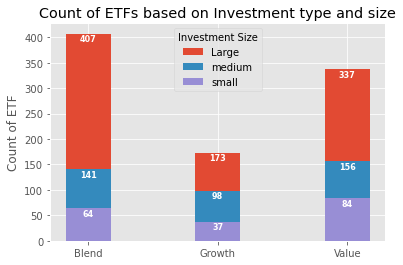

In [41]:
labels = ["Blend", "Growth", "Value"]
large = [407, 173, 337]
medium = [141, 98, 156]
small = [64, 37, 84]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, large, width, label='Large')
ax.bar(labels, medium, width,
       label='medium')
ax.bar(labels, small, width, label="small")


y_offset = -15
for bar in ax.patches:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height()),
      ha='center',
      color='w',
      weight='bold',
      size=8)

ax.set_ylabel('Count of ETF')
ax.set_title('Count of ETFs based on Investment type and size')
ax.legend(title = "Investment Size")
plt.style.use("ggplot")

plt.show()

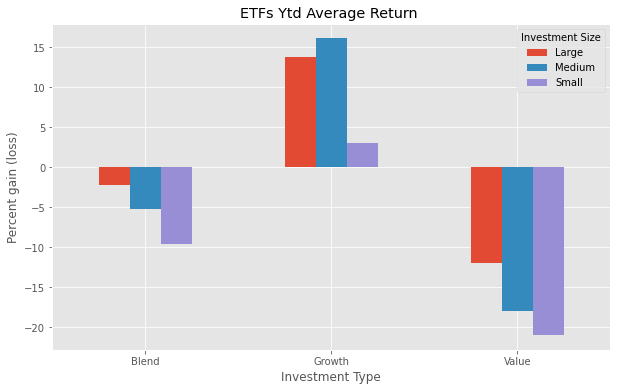

In [42]:
plotdata = pd.DataFrame({
    "Large": [-2.25, 13.74, -12.02],
    "Medium":[-5.19, 16.06, -18.00],
    "Small":[-9.57, 3.07, -20.94]
    }, 
    index= ["Blend", "Growth", "Value"]
)
fig, ax = plt.subplots(figsize=(10,6))
plotdata.plot(ax = ax, kind="bar")
plt.title("ETFs Ytd Average Return ")
plt.xlabel("Investment Type")
plt.xticks(rotation=0)
plt.ylabel("Percent gain (loss)")
plt.legend(title="Investment Size")

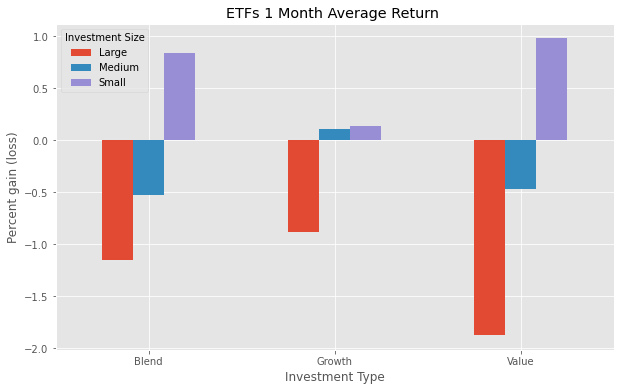

In [43]:
plotdata = pd.DataFrame({
    "Large": [-1.15, -0.88, -1.87],
    "Medium":[-0.52, 0.11, -0.47],
    "Small":[0.84, 0.14, 0.98]
    }, 
    index= ["Blend", "Growth", "Value"]
)
fig, ax = plt.subplots(figsize=(10,6))
plotdata.plot(ax = ax, kind="bar")
plt.title("ETFs 1 Month Average Return ")
plt.xlabel("Investment Type")
plt.xticks(rotation=0)
plt.ylabel("Percent gain (loss)")
plt.legend(title="Investment Size")

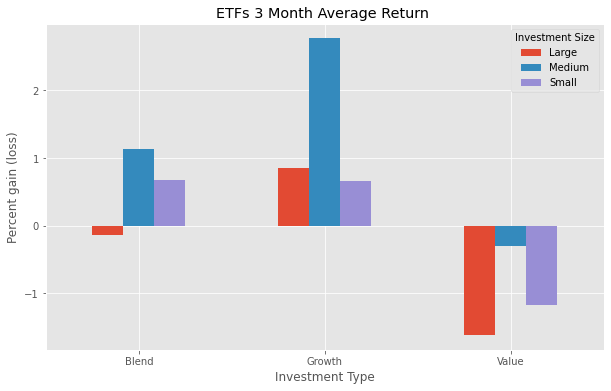

In [44]:
plotdata = pd.DataFrame({
    "Large": [-0.14, 0.85, -1.62],
    "Medium":[1.13, 2.77, -0.30],
    "Small":[0.68, 0.66, -1.17]
    }, 
    index= ["Blend", "Growth", "Value"]
)
fig, ax = plt.subplots(figsize=(10,6))
plotdata.plot(ax = ax, kind="bar")
plt.title("ETFs 3 Month Average Return ")
plt.xlabel("Investment Type")
plt.xticks(rotation=0)
plt.ylabel("Percent gain (loss)")
plt.legend(title="Investment Size")

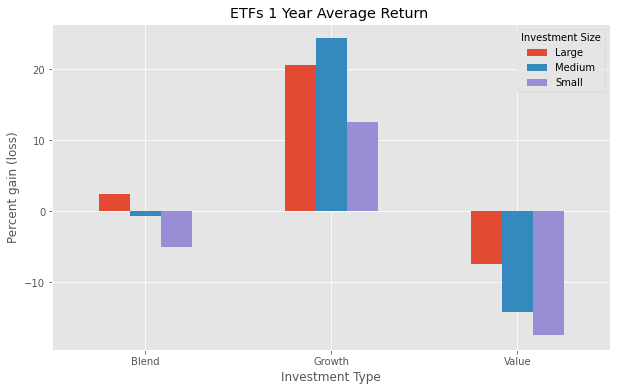

In [45]:
plotdata = pd.DataFrame({
    "Large": [2.38, 20.56, -7.47],
    "Medium":[-0.73, 24.36, -14.14],
    "Small":[-5.10, 12.53, -17.45]
    }, 
    index= ["Blend", "Growth", "Value"]
)
fig, ax = plt.subplots(figsize=(10,6))
plotdata.plot(ax = ax, kind="bar")
plt.title("ETFs 1 Year Average Return ")
plt.xlabel("Investment Type")
plt.xticks(rotation=0)
plt.ylabel("Percent gain (loss)")
plt.legend(title="Investment Size")

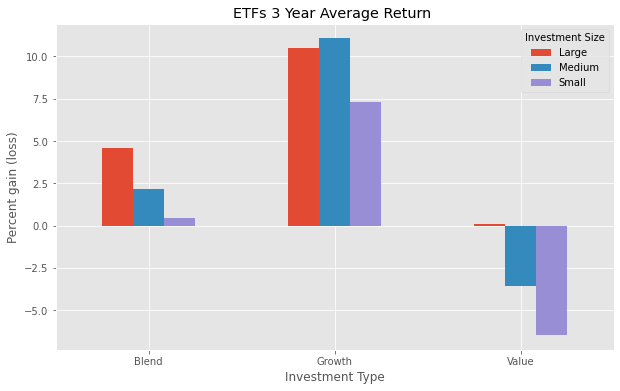

In [46]:
plotdata = pd.DataFrame({
    "Large": [4.60, 10.51, 0.09],
    "Medium":[2.17, 11.06, -3.60],
    "Small":[0.45, 7.31, -6.47]
    }, 
    index= ["Blend", "Growth", "Value"]
)
fig, ax = plt.subplots(figsize=(10,6))
plotdata.plot(ax = ax, kind="bar")
plt.title("ETFs 3 Year Average Return ")
plt.xlabel("Investment Type")
plt.xticks(rotation=0)
plt.ylabel("Percent gain (loss)")
plt.legend(title="Investment Size")

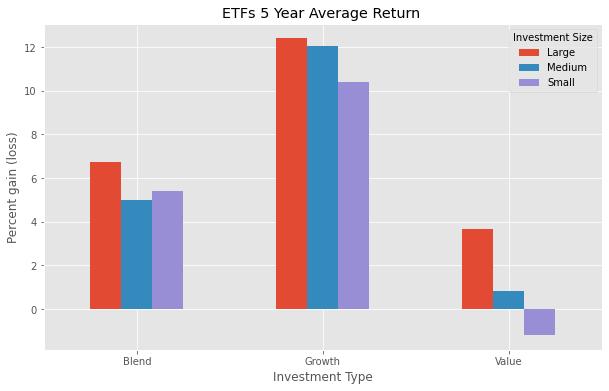

In [47]:
plotdata = pd.DataFrame({
    "Large": [6.75, 12.39, 3.68],
    "Medium":[4.99, 12.04, 0.81],
    "Small":[5.41, 10.39, -1.19]
    }, 
    index= ["Blend", "Growth", "Value"]
)
fig, ax = plt.subplots(figsize=(10,6))
plotdata.plot(ax = ax, kind="bar")
plt.title("ETFs 5 Year Average Return ")
plt.xlabel("Investment Type")
plt.xticks(rotation=0)
plt.ylabel("Percent gain (loss)")
plt.legend(title="Investment Size")

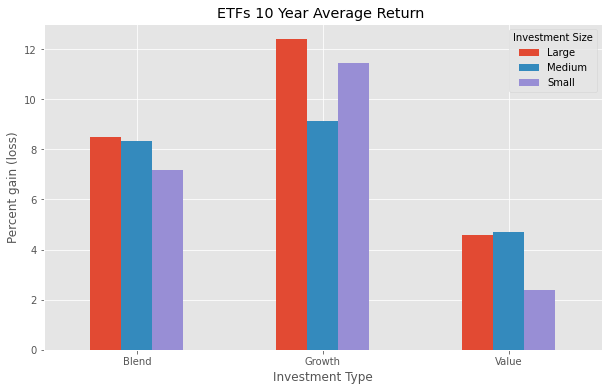

In [48]:
plotdata = pd.DataFrame({
    "Large": [8.50, 12.40, 4.59],
    "Medium":[8.33, 9.15, 4.72],
    "Small":[7.16, 11.45, 2.40]
    }, 
    index= ["Blend", "Growth", "Value"]
)
fig, ax = plt.subplots(figsize=(10,6))
plotdata.plot(ax = ax, kind="bar")
plt.title("ETFs 10 Year Average Return ")
plt.xlabel("Investment Type")
plt.xticks(rotation=0)
plt.ylabel("Percent gain (loss)")
plt.legend(title="Investment Size")

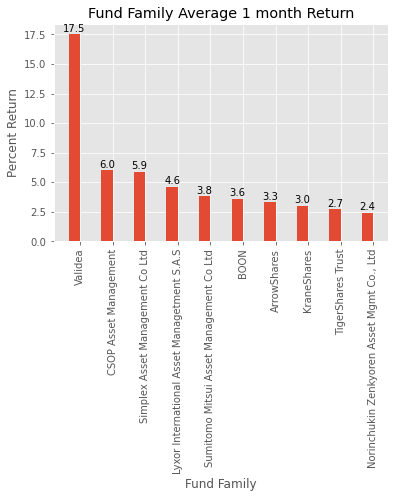

In [49]:
x = np.arange(len(fund_family_1month.head(10))) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

names = ["Validea","CSOP Asset Management","Simplex Asset Management Co Ltd",
         "Lyxor International Asset Managetment S.A.S","Sumitomo Mitsui Asset Management Co Ltd","BOON",
        "ArrowShares","KraneShares","TigerShares Trust","Norinchukin Zenkyoren Asset Mgmt Co., Ltd"]

ax.set_ylabel('Percent Return')
ax.set_xlabel("Fund Family")
ax.set_title('Fund Family Average 1 month Return')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation = 90)

pps = ax.bar(x - width/2, fund_family_1month.round(1).head(10), width, label='population')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 1), # 1 point vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

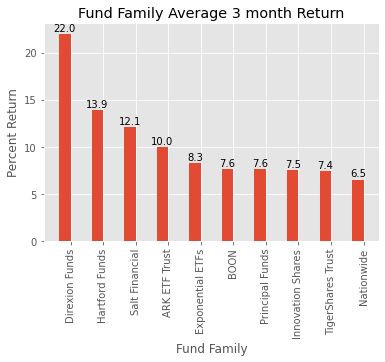

In [50]:
x = np.arange(len(fund_family_3months.head(10))) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

names = ["Direxion Funds","Hartford Funds", "Salt Financial", "ARK ETF Trust","Exponential ETFs", "BOON",
        "Principal Funds", "Innovation Shares","TigerShares Trust", "Nationwide"]

ax.set_ylabel('Percent Return')
ax.set_xlabel("Fund Family")
ax.set_title('Fund Family Average 3 month Return')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation = 90)

pps = ax.bar(x - width/2, fund_family_3months.round(1).head(10), width, label='population')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 1), # 1 point vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

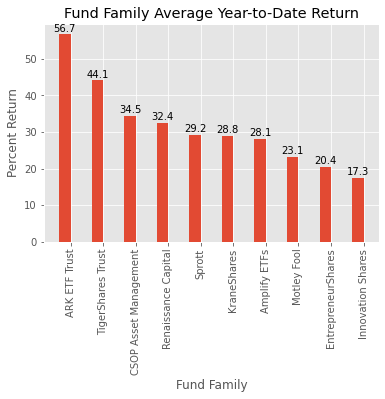

In [51]:
x = np.arange(len(fund_family_ytd.head(10))) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

names = ["ARK ETF Trust",
"TigerShares Trust",
"CSOP Asset Management",
"Renaissance Capital",
"Sprott",
"KraneShares",
"Amplify ETFs",
"Motley Fool",
"EntrepreneurShares",
"Innovation Shares"]

ax.set_ylabel('Percent Return')
ax.set_xlabel("Fund Family")
ax.set_title('Fund Family Average Year-to-Date Return')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation = 90)

pps = ax.bar(x - width/2, fund_family_ytd.round(1).head(10), width, label='population')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 1), # 1 point vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

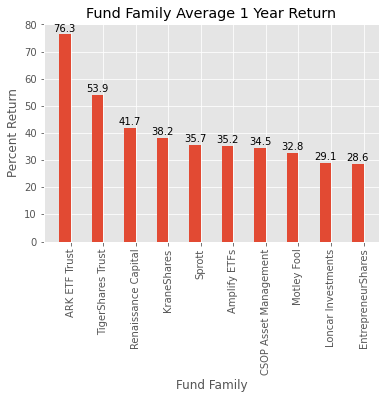

In [52]:
x = np.arange(len(fund_family1.head(10))) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

names = ["ARK ETF Trust", "TigerShares Trust", "Renaissance Capital", "KraneShares", "Sprott", "Amplify ETFs", 
         "CSOP Asset Management", "Motley Fool", "Loncar Investments", "EntrepreneurShares"]

ax.set_ylabel('Percent Return')
ax.set_xlabel("Fund Family")
ax.set_title('Fund Family Average 1 Year Return')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation = 90)

pps = ax.bar(x - width/2, fund_family1.round(1).head(10), width, label='population')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 1), # 1 point vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

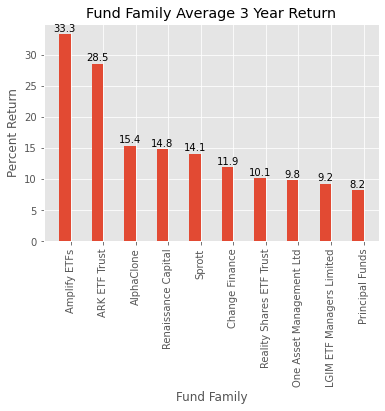

In [53]:
x = np.arange(len(fund_family3.head(10))) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

names = ["Amplify ETFs",
"ARK ETF Trust",
"AlphaClone",
"Renaissance Capital",
"Sprott",
"Change Finance",
"Reality Shares ETF Trust",
"One Asset Management Ltd",
"LGIM ETF Managers Limited",
"Principal Funds"]

ax.set_ylabel('Percent Return')
ax.set_xlabel("Fund Family")
ax.set_title('Fund Family Average 3 Year Return')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation = 90)

pps = ax.bar(x - width/2, fund_family3.round(1).head(10), width, label='population')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 1), # 1 point vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

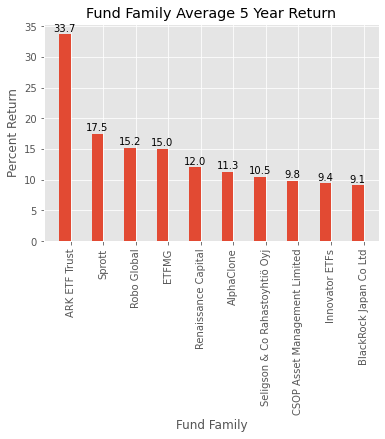

In [54]:
x = np.arange(len(fund_family5.head(10))) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

names = ["ARK ETF Trust",
"Sprott",
"Robo Global",
"ETFMG",
"Renaissance Capital",
"AlphaClone",
"Seligson & Co Rahastoyhtiö Oyj",
"CSOP Asset Management Limited",
"Innovator ETFs",
"BlackRock Japan Co Ltd"]

ax.set_ylabel('Percent Return')
ax.set_xlabel("Fund Family")
ax.set_title('Fund Family Average 5 Year Return')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation = 90)

pps = ax.bar(x - width/2, fund_family5.round(1).head(10), width, label='population')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 1), # 1 point vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

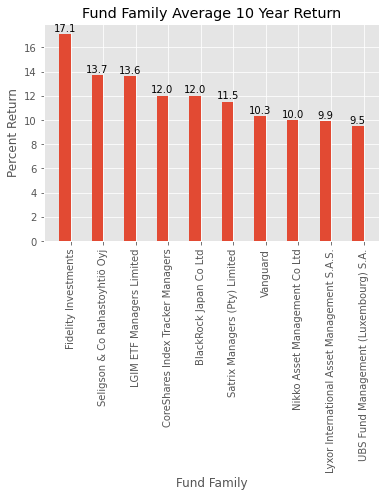

In [55]:
x = np.arange(len(fund_family10.head(10))) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

names = ["Fidelity Investments",
"Seligson & Co Rahastoyhtiö Oyj",
"LGIM ETF Managers Limited",
"CoreShares Index Tracker Managers",
"BlackRock Japan Co Ltd",
"Satrix Managers (Pty) Limited",
"Vanguard",
"Nikko Asset Management Co Ltd",
"Lyxor International Asset Management S.A.S.",
"UBS Fund Management (Luxembourg) S.A."]

ax.set_ylabel('Percent Return')
ax.set_xlabel("Fund Family")
ax.set_title('Fund Family Average 10 Year Return')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation = 90)

pps = ax.bar(x - width/2, fund_family10.round(1).head(10), width, label='population')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 1), # 1 point vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

# Growth-Based ETFs

## Top 20 Average return ETFs

In [56]:
top20_growth = growth_investment.nlargest(20, "avg_return")
top20_growth_groupby = top20_growth.groupby(by = ['category', 'fund_symbol'])['avg_return'].mean()
top20_growth_groupby

category              fund_symbol
China Region          CHIQ           34.910
                      CQQQ           26.906
Health                PTH            35.342
Large Growth          QQQ            25.214
Miscellaneous Sector  ICLN           40.984
                      PBD            39.040
                      PBW            55.118
                      QCLN           56.546
                      SMOG           35.138
                      TAN            66.714
Natural Resources     LIT            32.228
Technology            FDN            26.770
                      IGM            24.692
                      IGV            28.592
                      IYW            25.972
                      PNQI           32.500
                      PTF            32.322
                      VGT            24.706
                      XNTK           32.010
                      XSD            27.456
Name: avg_return, dtype: float64

In [57]:
def ChinaRegion_growth_loop():
    list1 = ["China Region"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(growth_investment[(growth_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(growth_investment
                                                                [(growth_investment['category'] == i)][j].std(),2))
            print("\n")
            print(i + "'s individual ETFs " + "ratio: \n", top20_growth[top20_growth["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_growth[top20_growth["category"] == i][j]:
                if k > (growth_investment[(growth_investment['category']== i)][j].mean() + growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (growth_investment[(growth_investment['category']== i)][j].mean() - growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
ChinaRegion_growth_loop()

China Region: Average price_earnings_ratio:  25.74
China Region: Standard Deviation price_earnings_ratio:  7.92


China Region's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
CHIQ                        28.99
CQQQ                        35.98
	
ETF values within 1 std from mean:  28.99
ETF values Greater than 1 std from mean:  35.98
____________________________________________________
	
China Region: Average price_book_ratio:  3.86
China Region: Standard Deviation price_book_ratio:  1.61


China Region's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
CHIQ                     3.82
CQQQ                     3.52
	
ETF values within 1 std from mean:  3.82
ETF values within 1 std from mean:  3.52
____________________________________________________
	
China Region: Average price_sales_ratio:  2.21
China Region: Standard Deviation price_sales_ratio:  0.9


China Region's individual ETFs ratio: 
              

In [58]:
def Health_growth_loop():
    list1 = ["Health"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(growth_investment[(growth_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(growth_investment[(growth_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + j + " values: \n", top20_growth[top20_growth["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_growth[top20_growth["category"] == i][j]:
                if k > (growth_investment[(growth_investment['category']== i)][j].mean() + growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (growth_investment[(growth_investment['category']== i)][j].mean() - growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Health_growth_loop()

Health: Average price_earnings_ratio:  29.96
Health: Standard Deviation price_earnings_ratio:  8.2


Health's individual ETFs price_earnings_ratio values: 
              price_earnings_ratio
fund_symbol                      
PTH                         34.22
	
ETF values within 1 std from mean:  34.22
____________________________________________________
	
Health: Average price_book_ratio:  4.96
Health: Standard Deviation price_book_ratio:  1.11


Health's individual ETFs price_book_ratio values: 
              price_book_ratio
fund_symbol                  
PTH                      6.32
	
ETF values Greater than 1 std from mean:  6.32
____________________________________________________
	
Health: Average price_sales_ratio:  5.07
Health: Standard Deviation price_sales_ratio:  2.41


Health's individual ETFs price_sales_ratio values: 
              price_sales_ratio
fund_symbol                   
PTH                       4.83
	
ETF values within 1 std from mean:  4.83
___________________

In [59]:
def Large_growth_loop():
    list1 = ["Large Growth"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(growth_investment[(growth_investment['category']== i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(growth_investment[(growth_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + j + " values: \n", top20_growth[top20_growth["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_growth[top20_growth["category"] == i][j]:
                if k > (growth_investment[(growth_investment['category']== i)][j].mean() + growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (growth_investment[(growth_investment['category']== i)][j].mean() - growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Large_growth_loop()

Large Growth: Average price_earnings_ratio:  32.45
Large Growth: Standard Deviation price_earnings_ratio:  3.68


Large Growth's individual ETFs price_earnings_ratio values: 
              price_earnings_ratio
fund_symbol                      
QQQ                         34.46
	
ETF values within 1 std from mean:  34.46
____________________________________________________
	
Large Growth: Average price_book_ratio:  6.91
Large Growth: Standard Deviation price_book_ratio:  2.04


Large Growth's individual ETFs price_book_ratio values: 
              price_book_ratio
fund_symbol                  
QQQ                      7.79
	
ETF values within 1 std from mean:  7.79
____________________________________________________
	
Large Growth: Average price_sales_ratio:  3.76
Large Growth: Standard Deviation price_sales_ratio:  1.23


Large Growth's individual ETFs price_sales_ratio values: 
              price_sales_ratio
fund_symbol                   
QQQ                       4.82
	
ETF values 

In [60]:
def Misc_growth_loop():
    list1 = ["Miscellaneous Sector"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(growth_investment[(growth_investment['category']== i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(growth_investment[(growth_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + j + " values: \n", top20_growth[top20_growth["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_growth[top20_growth["category"] == i][j]:
                if k > (growth_investment[(growth_investment['category']== i)][j].mean() + growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (growth_investment[(growth_investment['category']== i)][j].mean() - growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Misc_growth_loop()

Miscellaneous Sector: Average price_earnings_ratio:  29.98
Miscellaneous Sector: Standard Deviation price_earnings_ratio:  7.01


Miscellaneous Sector's individual ETFs price_earnings_ratio values: 
              price_earnings_ratio
fund_symbol                      
TAN                         31.87
QCLN                        28.09
PBW                         18.69
ICLN                        25.69
PBD                         18.57
SMOG                        38.17
	
ETF values within 1 std from mean:  31.87
ETF values within 1 std from mean:  28.09
ETF values less than 1 std from mean:  18.69
ETF values within 1 std from mean:  25.69
ETF values less than 1 std from mean:  18.57
ETF values Greater than 1 std from mean:  38.17
____________________________________________________
	
Miscellaneous Sector: Average price_book_ratio:  3.68
Miscellaneous Sector: Standard Deviation price_book_ratio:  1.36


Miscellaneous Sector's individual ETFs price_book_ratio values: 
              price_b

In [61]:
def Natr_Res_growth_loop():
    list1 = ["Natural Resources"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(growth_investment[(growth_investment['category']== i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(growth_investment[(growth_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + j + " values: \n", top20_growth[top20_growth["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_growth[top20_growth["category"] == i][j]:
                if k > (growth_investment[(growth_investment['category']== i)][j].mean() + growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (growth_investment[(growth_investment['category']== i)][j].mean() - growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("_________________________________________")
            print("\t")
Natr_Res_growth_loop()

Natural Resources: Average price_earnings_ratio:  30.98
Natural Resources: Standard Deviation price_earnings_ratio:  0.23


Natural Resources's individual ETFs price_earnings_ratio values: 
              price_earnings_ratio
fund_symbol                      
LIT                         30.81
	
ETF values within 1 std from mean:  30.81
_________________________________________
	
Natural Resources: Average price_book_ratio:  3.78
Natural Resources: Standard Deviation price_book_ratio:  0.08


Natural Resources's individual ETFs price_book_ratio values: 
              price_book_ratio
fund_symbol                  
LIT                      3.72
	
ETF values within 1 std from mean:  3.72
_________________________________________
	
Natural Resources: Average price_sales_ratio:  2.33
Natural Resources: Standard Deviation price_sales_ratio:  0.67


Natural Resources's individual ETFs price_sales_ratio values: 
              price_sales_ratio
fund_symbol                   
LIT                  

In [62]:
def Tech_growth_loop():
    list1 = ["Technology"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    n = 0
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(growth_investment[(growth_investment['category']== i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(growth_investment[(growth_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + j + " values: \n", top20_growth[top20_growth["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_growth[top20_growth["category"] == i][j]:
                if k > (growth_investment[(growth_investment['category']== i)][j].mean() + growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (growth_investment[(growth_investment['category']== i)][j].mean() - growth_investment[(growth_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("_________________________________________________")
            print("\t")
Tech_growth_loop()

Technology: Average price_earnings_ratio:  32.62
Technology: Standard Deviation price_earnings_ratio:  6.28


Technology's individual ETFs price_earnings_ratio values: 
              price_earnings_ratio
fund_symbol                      
PNQI                        39.12
PTF                         49.12
XNTK                        34.15
IGV                         40.47
XSD                         30.40
FDN                         37.13
IYW                         31.57
VGT                         30.98
IGM                         33.98
	
ETF values Greater than 1 std from mean:  39.12
ETF values Greater than 1 std from mean:  49.12
ETF values within 1 std from mean:  34.15
ETF values Greater than 1 std from mean:  40.47
ETF values within 1 std from mean:  30.4
ETF values within 1 std from mean:  37.13
ETF values within 1 std from mean:  31.57
ETF values within 1 std from mean:  30.98
ETF values within 1 std from mean:  33.98
_________________________________________________
	
Technol

In [167]:
growth_beta_top20 = top20_growth[["fund_symbol","fund_beta_3years","fund_beta_5years","fund_beta_10years"]]
growth_alpha_top20 = top20_growth[["fund_symbol","fund_alpha_3years","fund_alpha_5years","fund_alpha_10years"]]

growth_alpha_top20["avg_alpha"] = (top20_growth["fund_alpha_3years"] + top20_growth["fund_alpha_5years"] +
                   top20_growth["fund_alpha_10years"]) / 3

growth_beta_top20["avg_beta"] = (top20_growth["fund_beta_3years"] + top20_growth["fund_beta_5years"] +
                   top20_growth["fund_beta_10years"]) / 3

<ipython-input-167-e7ae2a87f704>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth_alpha_top20["avg_alpha"] = (top20_growth["fund_alpha_3years"] + top20_growth["fund_alpha_5years"] +
<ipython-input-167-e7ae2a87f704>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth_beta_top20["avg_beta"] = (top20_growth["fund_beta_3years"] + top20_growth["fund_beta_5years"] +


In [169]:
growth_beta_top20

,fund_symbol,fund_beta_3years,fund_beta_5years,fund_beta_10years,avg_beta
1462,TAN,1.46,1.40,1.82,1.560000
1241,QCLN,1.48,1.41,1.41,1.433333
1145,PBW,1.49,1.40,1.50,1.463333
781,ICLN,1.12,1.13,1.31,1.186667
1135,PBD,1.26,1.25,1.34,1.283333
1210,PTH,1.02,1.15,0.97,1.046667
1399,SMOG,1.36,1.31,1.32,1.330000
245,CHIQ,1.11,1.14,1.09,1.113333
1174,PNQI,1.19,1.20,1.15,1.180000
1209,PTF,1.06,1.10,1.06,1.073333


In [198]:
growth_beta_top20.describe()

,fund_beta_3years,fund_beta_5years,fund_beta_10years,avg_beta
count,20.000000,20.000000,20.000000,20.000000
mean,1.204000,1.206500,1.214500,1.208333
std,0.148196,0.111934,0.216223,0.152839
min,1.020000,1.070000,0.970000,1.046667
25%,1.110000,1.127500,1.050000,1.082500
50%,1.130000,1.155000,1.145000,1.175000
75%,1.300000,1.287500,1.325000,1.295000
max,1.490000,1.410000,1.820000,1.560000


In [206]:
growth_alpha_top20

,fund_symbol,fund_alpha_3years,fund_alpha_5years,fund_alpha_10years,avg_alpha
1462,TAN,34.56,12.79,-5.70,13.883333
1241,QCLN,24.45,15.27,3.33,14.350000
1145,PBW,29.32,14.76,-4.17,13.303333
781,ICLN,22.82,8.94,-3.74,9.340000
1135,PBD,15.66,7.22,-2.17,6.903333
1210,PTH,19.35,11.82,11.18,14.116667
1399,SMOG,15.91,7.84,-1.02,7.576667
245,CHIQ,21.05,14.23,3.03,12.770000
1174,PNQI,14.41,10.85,9.98,11.746667
1209,PTF,20.15,12.55,8.31,13.670000


In [199]:
growth_alpha_top20.describe()

,fund_alpha_3years,fund_alpha_5years,fund_alpha_10years,avg_alpha
count,20.000000,20.000000,20.000000,20.000000
mean,17.434500,11.766500,4.670500,11.290500
std,7.104865,2.660871,6.256965,3.391640
min,1.140000,6.840000,-6.690000,0.960000
25%,14.815000,10.162500,-1.307500,10.197500
50%,16.025000,12.585000,8.455000,12.465000
75%,20.375000,13.412500,9.830000,13.723333
max,34.560000,15.280000,11.180000,14.350000


<AxesSubplot:>

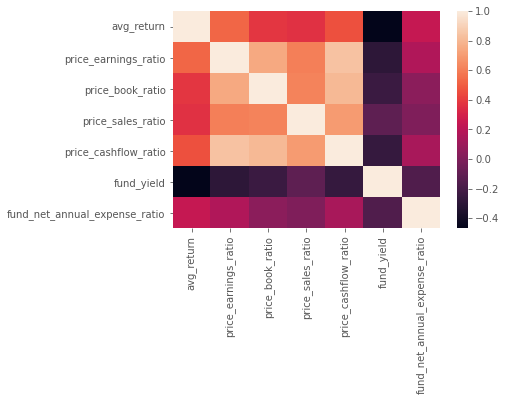

In [63]:
sns.heatmap(growth_investment[["avg_return","price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio"]].corr())

<AxesSubplot:>

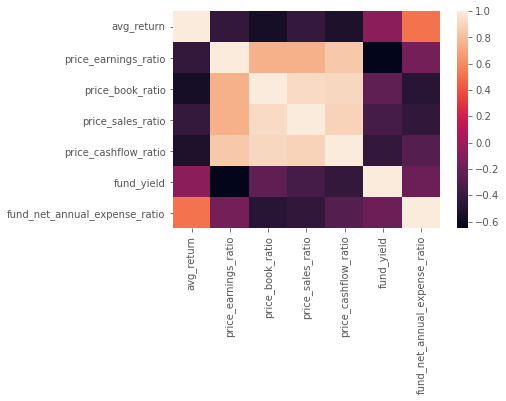

In [64]:
sns.heatmap(top20_growth[["avg_return","price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio"]].corr())

# financial ratios are less correlated to the average returns of the top 20 growth based ETFs in comparison to the 
# entire growth based ETFs in the dataset

## linear regression for top 20 growth-based ETFs

In [65]:
x = top20_growth[["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio"]]
y = top20_growth['avg_return']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=42)

In [67]:
linear_model = LinearRegression()

In [68]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred = linear_model.predict(x_test)


In [70]:
r2 = linear_model.score(x,y)

In [71]:
r2

-11.929414189984278

## linear regression for all growth based ETFs

In [72]:
x = growth_investment[["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio"]].notna()
y = growth_investment["avg_return"].notna()

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=42)

In [74]:
linear_model = LinearRegression()

In [75]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [76]:
y_pred = linear_model.predict(x_test)

In [77]:
r2 = linear_model.score(x,y)

In [78]:
r2

0.010808858412041267

In [79]:
# linear regression not appropriate model for top 20 ETFs, financial ratios only account for 1% of all growth based 
# ETFs for average returns

## visuals for top 20 growth based ETFs

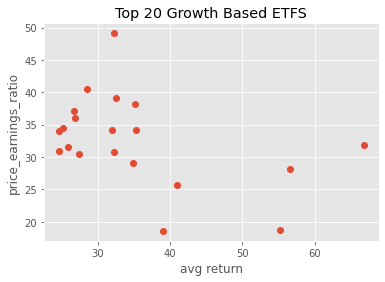

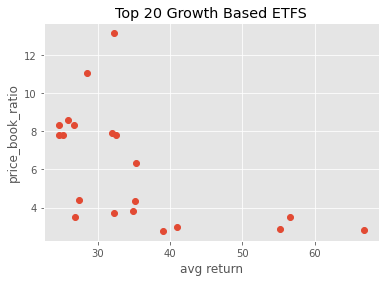

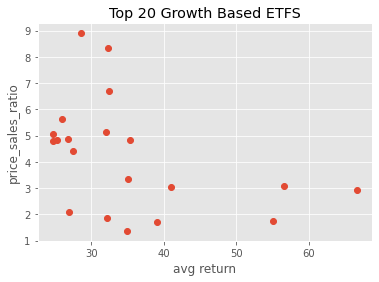

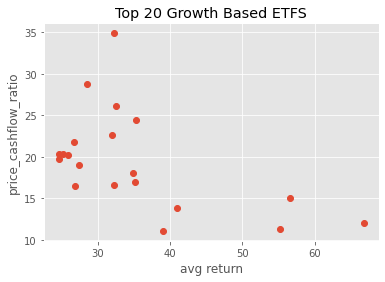

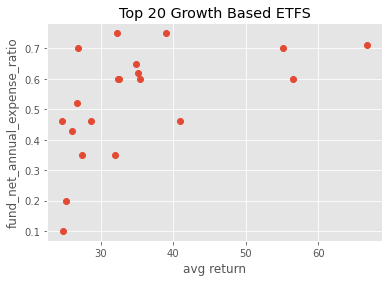

In [80]:
for i in range(5):    
    ratios1 = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio",
             "fund_net_annual_expense_ratio"]
    x = top20_growth["avg_return"]
    y = top20_growth[ratios1[i]]
    plt.plot(x,y,"o")
    plt.xlabel("avg return")
    plt.title("Top 20 Growth Based ETFS")
    plt.ylabel(ratios1[i])
    plt.show()
    
# None of the scatterplots show any kind of clear relationship between the individual ratio and average return

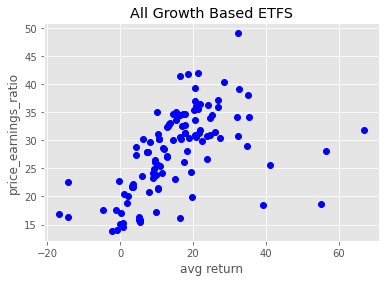

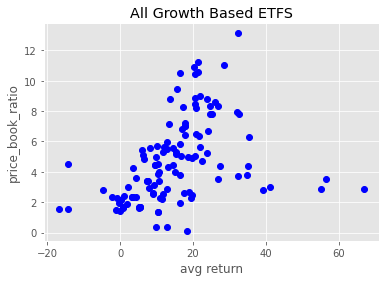

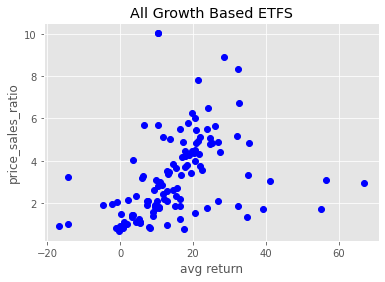

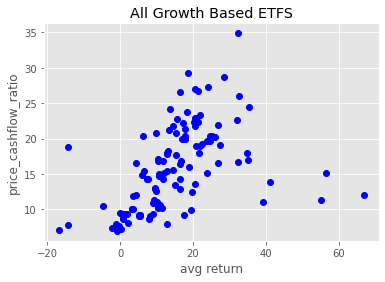

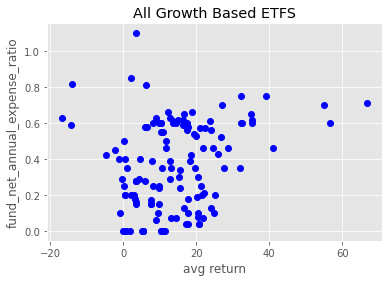

In [81]:
for i in range(5):
        ratios2 = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio",
             "fund_net_annual_expense_ratio"]
        x = growth_investment["avg_return"]
        y = growth_investment[ratios2[i]]
        plt.plot(x,y,"o",color='b')
        plt.xlabel("avg return")
        plt.title("All Growth Based ETFS")
        plt.ylabel(ratios2[i])
        plt.show()

In [82]:
# the above 5 scatterplots sort've show a positive correlation between individual ratios and avg return, still not
# super clear

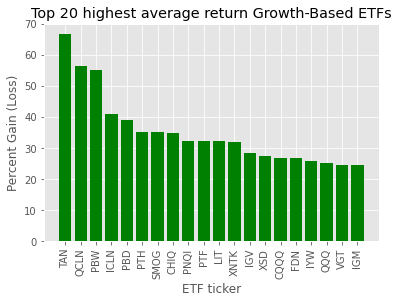

In [83]:
vals = list(top20_growth["avg_return"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(top20_growth["fund_symbol"], top20_growth["avg_return"], color = colors)
plt.title("Top 20 highest average return Growth-Based ETFs")
plt.xlabel("ETF ticker")
plt.ylabel("Percent Gain (Loss)")
plt.xticks(rotation = 90)
plt.show()

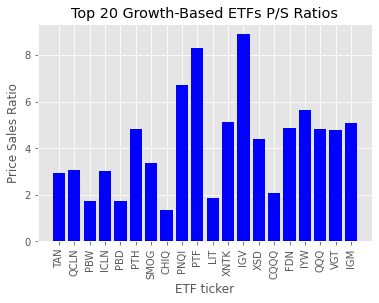

In [189]:
plt.bar(top20_growth["fund_symbol"], top20_growth["price_sales_ratio"], color = "b")
plt.title("Top 20 Growth-Based ETFs P/S Ratios")
plt.xlabel("ETF ticker")
plt.ylabel("Price Sales Ratio")
plt.xticks(rotation = 90)
plt.show()

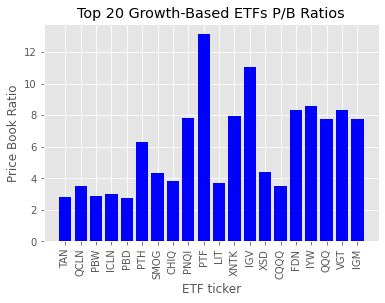

In [190]:
plt.bar(top20_growth["fund_symbol"], top20_growth["price_book_ratio"], color = "b")
plt.title("Top 20 Growth-Based ETFs P/B Ratios")
plt.xlabel("ETF ticker")
plt.ylabel("Price Book Ratio")
plt.xticks(rotation = 90)
plt.show()

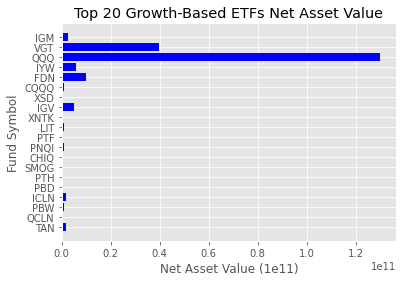

In [191]:
plt.barh(top20_growth["fund_symbol"], top20_growth["net_asset_value"], color = "b")
plt.title("Top 20 Growth-Based ETFs Net Asset Value")
plt.xlabel("Net Asset Value (1e11)")
plt.ylabel("Fund Symbol")
plt.show()

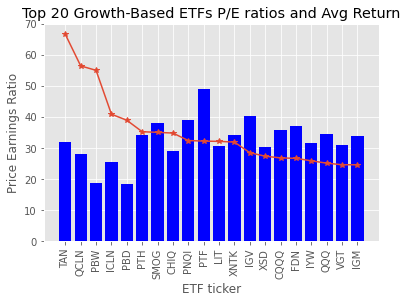

In [87]:
plt.bar(top20_growth["fund_symbol"], top20_growth["price_earnings_ratio"], color = "b")
plt.plot(top20_growth["fund_symbol"], top20_growth["avg_return"], marker = "*")
plt.title("Top 20 Growth-Based ETFs P/E ratios and Avg Return")
plt.xlabel("ETF ticker")
plt.ylabel("Price Earnings Ratio")
plt.xticks(rotation = 90)
plt.show()

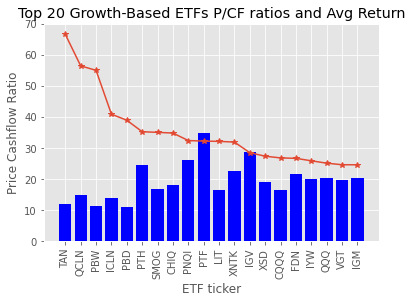

In [88]:
plt.bar(top20_growth["fund_symbol"], top20_growth["price_cashflow_ratio"], color = "b")
plt.plot(top20_growth["fund_symbol"], top20_growth["avg_return"], marker = "*")
plt.title("Top 20 Growth-Based ETFs P/CF ratios and Avg Return")
plt.xlabel("ETF ticker")
plt.ylabel("Price Cashflow Ratio")
plt.xticks(rotation = 90)
plt.show()

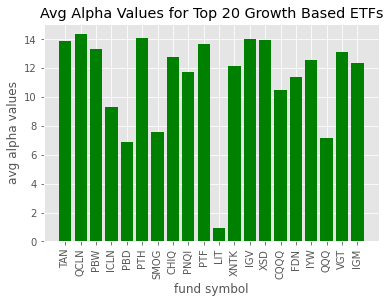

In [186]:
plt.bar(growth_alpha_top20["fund_symbol"], growth_alpha_top20["avg_alpha"], color = 'g')
plt.title("Avg Alpha Values for Top 20 Growth Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('avg alpha values')
plt.xticks(rotation=90)
plt.show()

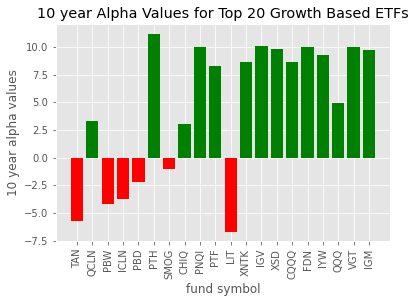

In [183]:
vals = list(growth_alpha_top20["fund_alpha_10years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(growth_alpha_top20["fund_symbol"], growth_alpha_top20["fund_alpha_10years"], color = colors)
plt.title("10 year Alpha Values for Top 20 Growth Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('10 year alpha values')
plt.xticks(rotation=90)
plt.show()

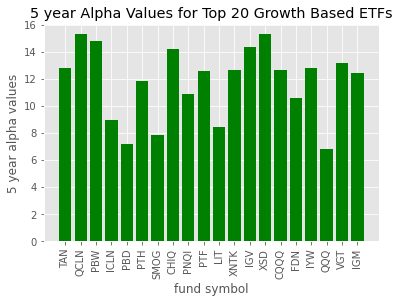

In [184]:
vals = list(growth_alpha_top20["fund_alpha_5years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(growth_alpha_top20["fund_symbol"], growth_alpha_top20["fund_alpha_5years"], color = colors)
plt.title("5 year Alpha Values for Top 20 Growth Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('5 year alpha values')
plt.xticks(rotation=90)
plt.show()

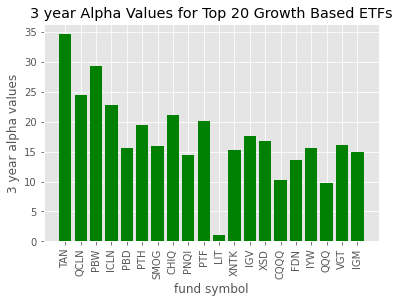

In [185]:
vals = list(growth_alpha_top20["fund_alpha_3years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(growth_alpha_top20["fund_symbol"], growth_alpha_top20["fund_alpha_3years"], color = colors)
plt.title("3 year Alpha Values for Top 20 Growth Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('3 year alpha values')
plt.xticks(rotation=90)
plt.show()

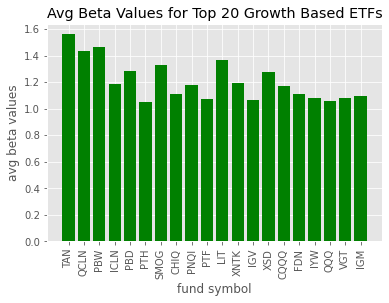

In [188]:
plt.bar(growth_beta_top20["fund_symbol"], growth_beta_top20["avg_beta"], color = 'g')
plt.title("Avg Beta Values for Top 20 Growth Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('avg beta values')
plt.xticks(rotation=90)
plt.show()

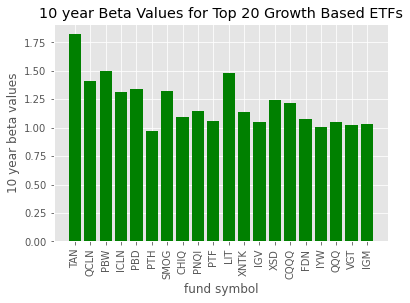

In [192]:
vals = list(growth_beta_top20["fund_beta_10years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(growth_beta_top20["fund_symbol"], growth_beta_top20["fund_beta_10years"], color = colors)
plt.title("10 year Beta Values for Top 20 Growth Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('10 year beta values')
plt.xticks(rotation=90)
plt.show()

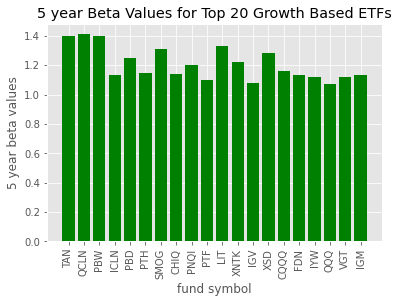

In [193]:
vals = list(growth_beta_top20["fund_beta_5years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(growth_beta_top20["fund_symbol"], growth_beta_top20["fund_beta_5years"], color = colors)
plt.title("5 year Beta Values for Top 20 Growth Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('5 year beta values')
plt.xticks(rotation=90)
plt.show()

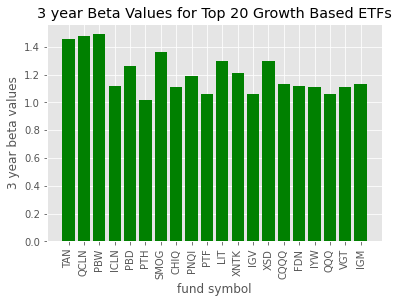

In [194]:
vals = list(growth_beta_top20["fund_beta_3years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(growth_beta_top20["fund_symbol"], growth_beta_top20["fund_beta_3years"], color = colors)
plt.title("3 year Beta Values for Top 20 Growth Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('3 year beta values')
plt.xticks(rotation=90)
plt.show()

# Value Based ETFs

## Top 20 Avg Return ETFs

In [89]:
top20_value = value_investment.nlargest(20, "avg_return")
top20_value_groupby = top20_value.groupby(by = ['category', 'fund_symbol'])['avg_return'].mean()
top20_value_groupby

category            fund_symbol
China Region        CHIM            9.320
                    EWT            11.772
Consumer Defensive  XLP             6.462
Financial           RWW             9.014
Industrials         IYT             5.950
Large Blend         EPS             5.360
                    EQWL            5.566
                    FTCS            8.292
Large Value         PFM             5.862
Natural Resources   RTM             8.146
Utilities           XLU             5.902
World Stock         LVL             6.702
Name: avg_return, dtype: float64

In [90]:
def Value_ChinaRegion_loop():
    list1 = ["China Region"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(value_investment[(value_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(value_investment[(value_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_value[top20_value["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_value[top20_value["category"] == i][j]:
                if k > (value_investment[(value_investment['category']== i)][j].mean() + value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (value_investment[(value_investment['category']== i)][j].mean() - value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Value_ChinaRegion_loop()

China Region: Average price_earnings_ratio:  10.32
China Region: Standard Deviation price_earnings_ratio:  3.92


China Region's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
EWT                         17.00
CHIM                        13.46
	
ETF values Greater than 1 std from mean:  17.0
ETF values within 1 std from mean:  13.46
____________________________________________________
	
China Region: Average price_book_ratio:  1.01
China Region: Standard Deviation price_book_ratio:  0.33


China Region's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
EWT                      1.75
CHIM                     1.31
	
ETF values Greater than 1 std from mean:  1.75
ETF values within 1 std from mean:  1.31
____________________________________________________
	
China Region: Average price_sales_ratio:  0.93
China Region: Standard Deviation price_sales_ratio:  0.45


China Region's individual ETFs ratio: 
        

In [91]:
def Value_Consumer_Defensive_loop():
    list1 = ["Consumer Defensive"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(value_investment[(value_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(value_investment[(value_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_value[top20_value["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_value[top20_value["category"] == i][j]:
                if k > (value_investment[(value_investment['category']== i)][j].mean() + value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (value_investment[(value_investment['category']== i)][j].mean() - value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Value_Consumer_Defensive_loop()

Consumer Defensive: Average price_earnings_ratio:  22.54
Consumer Defensive: Standard Deviation price_earnings_ratio:  3.05


Consumer Defensive's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
XLP                         23.99
	
ETF values within 1 std from mean:  23.99
____________________________________________________
	
Consumer Defensive: Average price_book_ratio:  3.71
Consumer Defensive: Standard Deviation price_book_ratio:  1.32


Consumer Defensive's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
XLP                      5.34
	
ETF values Greater than 1 std from mean:  5.34
____________________________________________________
	
Consumer Defensive: Average price_sales_ratio:  1.26
Consumer Defensive: Standard Deviation price_sales_ratio:  0.51


Consumer Defensive's individual ETFs ratio: 
              price_sales_ratio
fund_symbol                   
XLP                       1.48
	
ETF values

In [92]:
def Value_financial_loop():
    list1 = ["Financial"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(value_investment[(value_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(value_investment[(value_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_value[top20_value["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_value[top20_value["category"] == i][j]:
                if k > (value_investment[(value_investment['category']== i)][j].mean() + value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (value_investment[(value_investment['category']== i)][j].mean() - value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Value_financial_loop()

Financial: Average price_earnings_ratio:  12.68
Financial: Standard Deviation price_earnings_ratio:  2.18


Financial's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
RWW                         12.79
	
ETF values within 1 std from mean:  12.79
____________________________________________________
	
Financial: Average price_book_ratio:  0.96
Financial: Standard Deviation price_book_ratio:  0.24


Financial's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
RWW                      1.19
	
ETF values within 1 std from mean:  1.19
____________________________________________________
	
Financial: Average price_sales_ratio:  1.84
Financial: Standard Deviation price_sales_ratio:  0.9


Financial's individual ETFs ratio: 
              price_sales_ratio
fund_symbol                   
RWW                       1.63
	
ETF values within 1 std from mean:  1.63
____________________________________________________
	
Fi

In [93]:
def Value_Industrials_loop():
    list1 = ["Industrials"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(value_investment[(value_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(value_investment[(value_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_value[top20_value["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_value[top20_value["category"] == i][j]:
                if k > (value_investment[(value_investment['category']== i)][j].mean() + value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (value_investment[(value_investment['category']== i)][j].mean() - value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Value_Industrials_loop()

Industrials: Average price_earnings_ratio:  19.81
Industrials: Standard Deviation price_earnings_ratio:  8.91


Industrials's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
IYT                         29.43
	
ETF values Greater than 1 std from mean:  29.43
____________________________________________________
	
Industrials: Average price_book_ratio:  2.21
Industrials: Standard Deviation price_book_ratio:  1.52


Industrials's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
IYT                      2.83
	
ETF values within 1 std from mean:  2.83
____________________________________________________
	
Industrials: Average price_sales_ratio:  0.84
Industrials: Standard Deviation price_sales_ratio:  0.68


Industrials's individual ETFs ratio: 
              price_sales_ratio
fund_symbol                   
IYT                       0.73
	
ETF values within 1 std from mean:  0.73
________________________________

In [94]:
def Value_LargeBlend_loop():
    list1 = ["Large Blend"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(value_investment[(value_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(value_investment[(value_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_value[top20_value["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_value[top20_value["category"] == i][j]:
                if k > (value_investment[(value_investment['category']== i)][j].mean() + value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (value_investment[(value_investment['category']== i)][j].mean() - value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Value_LargeBlend_loop()

Large Blend: Average price_earnings_ratio:  21.59
Large Blend: Standard Deviation price_earnings_ratio:  3.1


Large Blend's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
FTCS                        21.02
EQWL                        20.20
EPS                         20.93
	
ETF values within 1 std from mean:  21.02
ETF values within 1 std from mean:  20.2
ETF values within 1 std from mean:  20.93
____________________________________________________
	
Large Blend: Average price_book_ratio:  3.0
Large Blend: Standard Deviation price_book_ratio:  1.13


Large Blend's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
FTCS                     5.82
EQWL                     2.13
EPS                      2.62
	
ETF values Greater than 1 std from mean:  5.82
ETF values within 1 std from mean:  2.13
ETF values within 1 std from mean:  2.62
____________________________________________________
	
Large Blend: Average 

In [95]:
def Value_LargeValue_loop():
    list1 = ["Large Value"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(value_investment[(value_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(value_investment[(value_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_value[top20_value["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_value[top20_value["category"] == i][j]:
                if k > (value_investment[(value_investment['category']== i)][j].mean() + value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (value_investment[(value_investment['category']== i)][j].mean() - value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Value_LargeValue_loop()

Large Value: Average price_earnings_ratio:  17.81
Large Value: Standard Deviation price_earnings_ratio:  2.72


Large Value's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
PFM                         24.24
	
ETF values Greater than 1 std from mean:  24.24
____________________________________________________
	
Large Value: Average price_book_ratio:  2.14
Large Value: Standard Deviation price_book_ratio:  0.79


Large Value's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
PFM                      3.63
	
ETF values Greater than 1 std from mean:  3.63
____________________________________________________
	
Large Value: Average price_sales_ratio:  1.28
Large Value: Standard Deviation price_sales_ratio:  0.47


Large Value's individual ETFs ratio: 
              price_sales_ratio
fund_symbol                   
PFM                       1.76
	
ETF values Greater than 1 std from mean:  1.76
____________________

In [96]:
def Value_NatrResc_loop():
    list1 = ["Natural Resources"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(value_investment[(value_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(value_investment[(value_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_value[top20_value["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_value[top20_value["category"] == i][j]:
                if k > (value_investment[(value_investment['category']== i)][j].mean() + value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (value_investment[(value_investment['category']== i)][j].mean() - value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Value_NatrResc_loop()

Natural Resources: Average price_earnings_ratio:  18.46
Natural Resources: Standard Deviation price_earnings_ratio:  4.82


Natural Resources's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
RTM                          22.6
	
ETF values within 1 std from mean:  22.6
____________________________________________________
	
Natural Resources: Average price_book_ratio:  1.56
Natural Resources: Standard Deviation price_book_ratio:  0.52


Natural Resources's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
RTM                      2.23
	
ETF values Greater than 1 std from mean:  2.23
____________________________________________________
	
Natural Resources: Average price_sales_ratio:  0.86
Natural Resources: Standard Deviation price_sales_ratio:  0.33


Natural Resources's individual ETFs ratio: 
              price_sales_ratio
fund_symbol                   
RTM                       1.29
	
ETF values Greater t

In [97]:
def Value_Utilities_loop():
    list1 = ["Utilities"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(value_investment[(value_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(value_investment[(value_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_value[top20_value["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_value[top20_value["category"] == i][j]:
                if k > (value_investment[(value_investment['category']== i)][j].mean() + value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (value_investment[(value_investment['category']== i)][j].mean() - value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Value_Utilities_loop()

Utilities: Average price_earnings_ratio:  19.0
Utilities: Standard Deviation price_earnings_ratio:  3.6


Utilities's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
XLU                         22.27
	
ETF values within 1 std from mean:  22.27
____________________________________________________
	
Utilities: Average price_book_ratio:  1.98
Utilities: Standard Deviation price_book_ratio:  0.14


Utilities's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
XLU                      2.19
	
ETF values Greater than 1 std from mean:  2.19
____________________________________________________
	
Utilities: Average price_sales_ratio:  2.14
Utilities: Standard Deviation price_sales_ratio:  0.44


Utilities's individual ETFs ratio: 
              price_sales_ratio
fund_symbol                   
XLU                       2.86
	
ETF values Greater than 1 std from mean:  2.86
______________________________________________

In [98]:
def Value_WorldStock_loop():
    list1 = ["World Stock"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(value_investment[(value_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(value_investment[(value_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_value[top20_value["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_value[top20_value["category"] == i][j]:
                if k > (value_investment[(value_investment['category']== i)][j].mean() + value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (value_investment[(value_investment['category']== i)][j].mean() - value_investment[(value_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Value_WorldStock_loop()

World Stock: Average price_earnings_ratio:  16.81
World Stock: Standard Deviation price_earnings_ratio:  2.89


World Stock's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
LVL                         15.85
	
ETF values within 1 std from mean:  15.85
____________________________________________________
	
World Stock: Average price_book_ratio:  1.78
World Stock: Standard Deviation price_book_ratio:  0.61


World Stock's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
LVL                      1.77
	
ETF values within 1 std from mean:  1.77
____________________________________________________
	
World Stock: Average price_sales_ratio:  1.31
World Stock: Standard Deviation price_sales_ratio:  0.48


World Stock's individual ETFs ratio: 
              price_sales_ratio
fund_symbol                   
LVL                       1.42
	
ETF values within 1 std from mean:  1.42
______________________________________

In [195]:
value_beta_top20 = top20_value[["fund_symbol","fund_beta_3years","fund_beta_5years","fund_beta_10years"]]
value_alpha_top20 = top20_value[["fund_symbol","fund_alpha_3years","fund_alpha_5years","fund_alpha_10years"]]

value_alpha_top20["avg_alpha"] = (top20_value["fund_alpha_3years"] + top20_value["fund_alpha_5years"] +
                   top20_value["fund_alpha_10years"]) / 3

value_beta_top20["avg_beta"] = (top20_value["fund_beta_3years"] + top20_value["fund_beta_5years"] +
                   top20_value["fund_beta_10years"]) / 3

<ipython-input-195-3b9b14d233c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_alpha_top20["avg_alpha"] = (top20_value["fund_alpha_3years"] + top20_value["fund_alpha_5years"] +
<ipython-input-195-3b9b14d233c0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_beta_top20["avg_beta"] = (top20_value["fund_beta_3years"] + top20_value["fund_beta_5years"] +


In [197]:
value_beta_top20

,fund_symbol,fund_beta_3years,fund_beta_5years,fund_beta_10years,avg_beta
491,EWT,0.97,0.90,0.85,0.906667
1229,PXMV,0.90,0.93,1.02,0.950000
244,CHIM,1.09,1.13,1.24,1.153333
1323,RWW,1.21,1.10,1.18,1.163333
627,FTCS,0.89,0.88,1.00,0.923333
1314,RTM,1.16,1.17,1.18,1.170000
96,1629,0.86,0.93,0.86,0.883333
107,1646,0.86,0.94,0.87,0.890000
105,1644,0.60,0.73,0.69,0.673333
1047,LVL,0.66,0.91,0.91,0.826667


In [200]:
value_beta_top20.describe()

,fund_beta_3years,fund_beta_5years,fund_beta_10years,avg_beta
count,20.000000,20.000000,20.000000,20.000000
mean,0.886500,0.911000,0.903500,0.900333
std,0.234729,0.208551,0.236916,0.220724
min,0.380000,0.360000,0.270000,0.336667
25%,0.697500,0.820000,0.805000,0.813333
50%,0.895000,0.930000,0.930000,0.915000
75%,1.037500,1.040000,1.025000,1.043333
max,1.290000,1.240000,1.240000,1.190000


In [202]:
value_alpha_top20

,fund_symbol,fund_alpha_3years,fund_alpha_5years,fund_alpha_10years,avg_alpha
491,EWT,9.39,9.13,5.01,7.843333
1229,PXMV,-3.94,-3.30,-1.28,-2.840000
244,CHIM,0.31,7.19,-4.02,1.160000
1323,RWW,-2.92,2.07,1.52,0.223333
627,FTCS,-0.63,0.49,-0.37,-0.170000
1314,RTM,-0.18,1.41,0.64,0.623333
96,1629,7.51,3.57,4.66,5.246667
107,1646,7.64,3.71,4.71,5.353333
105,1644,-1.20,-0.72,-7.78,-3.233333
1047,LVL,3.55,1.42,-0.82,1.383333


In [203]:
value_alpha_top20.describe()

,fund_alpha_3years,fund_alpha_5years,fund_alpha_10years,avg_alpha
count,20.000000,20.000000,20.000000,20.000000
mean,1.128000,1.185500,0.369000,0.894167
std,4.409419,3.652847,4.254768,3.570886
min,-4.740000,-5.490000,-7.900000,-4.570000
25%,-1.710000,-0.975000,-1.175000,-1.573333
50%,-0.525000,0.460000,-0.170000,0.198333
75%,4.410000,2.677500,2.852500,3.676667
max,9.390000,9.130000,8.450000,7.843333


<AxesSubplot:>

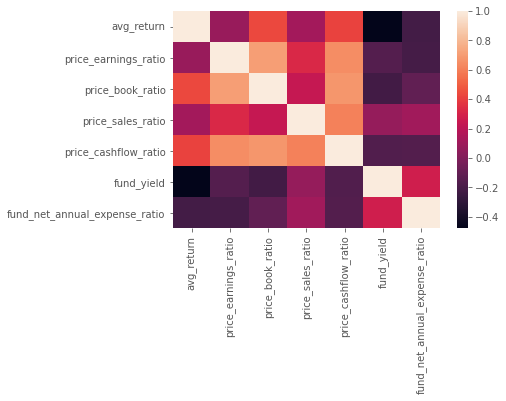

In [99]:
sns.heatmap(value_investment[["avg_return","price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio"]].corr())

#price to cash flow and price to book ratio appear to have a higher correlation to avg return in comparison to the 
# other ratios

<AxesSubplot:>

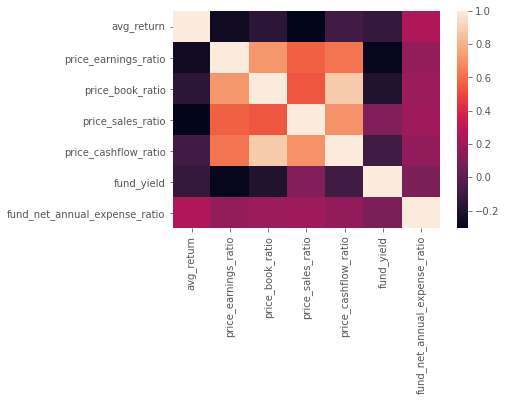

In [100]:
sns.heatmap(top20_value[["avg_return","price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio"]].corr())

## linear regresson for top 20 value based ETFs

In [101]:
nonNan_value20 = value_investment.nlargest(21,"avg_return")
nonNan_value20[["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio"]]
nonNan_value20 = nonNan_value20.drop(labels=[1323], axis=0)

# one of the top 20 value based ETFs contained a nan value for price_earnings_ratio, I removed it and replaced it with
# the next highest avg return for value based ETFs. nlargest of 21 brings in the next highest value, and then in 
# nonNan_value20, I remove the ETF with the Nan value so I could perform the linear regression

In [102]:
x = nonNan_value20[["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio"]]
y = top20_value['avg_return']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=42)

In [104]:
linear_model = LinearRegression()

In [105]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [106]:
y_pred = linear_model.predict(x_test)

In [107]:
r2 = linear_model.score(x,y)

In [108]:
r2

-2.5467053766663525

In [109]:
# linear regression still not appropriate model for Value based ETFs, but not as bad as Growth based ETFs

## visuals for top 20 value based ETFs

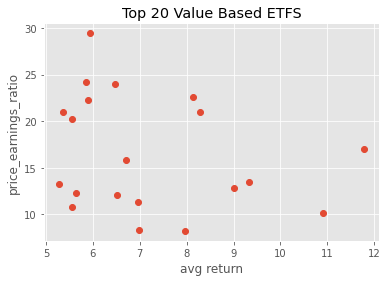

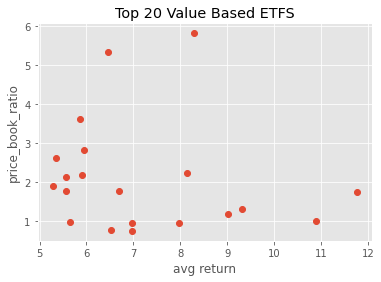

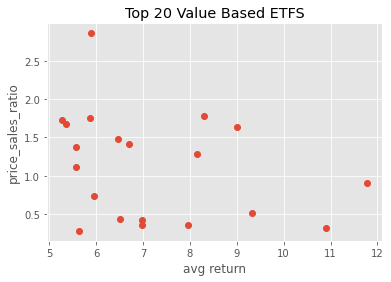

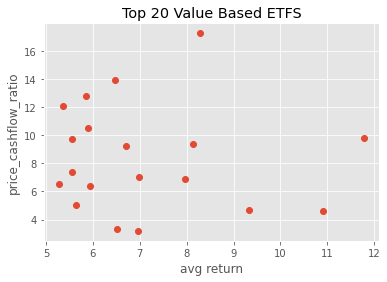

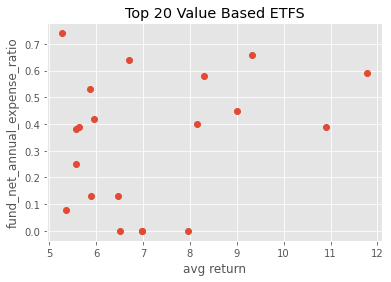

In [110]:
for i in range(5):    
    ratios1 = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio",
             "fund_net_annual_expense_ratio"]
    x = top20_value["avg_return"]
    y = top20_value[ratios1[i]]
    plt.plot(x,y,"o")
    plt.xlabel("avg return")
    plt.title("Top 20 Value Based ETFS")
    plt.ylabel(ratios1[i])
    plt.show()

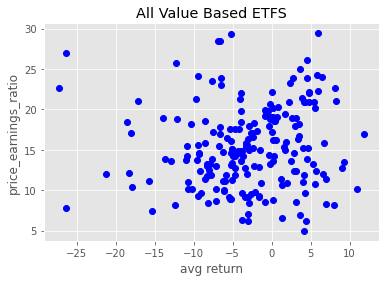

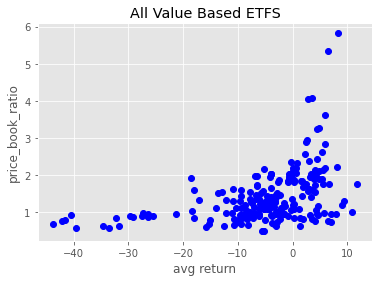

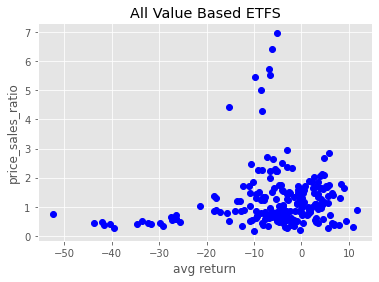

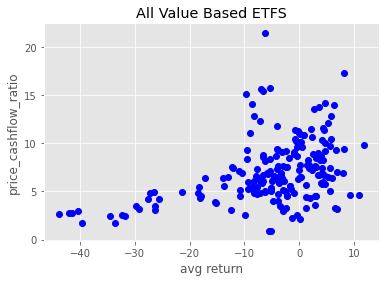

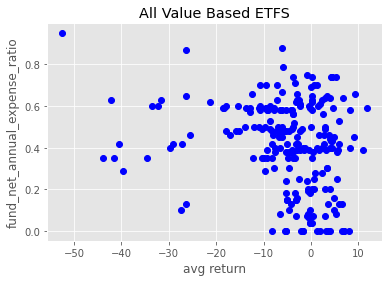

In [111]:
for i in range(5):
        ratios2 = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio",
             "fund_net_annual_expense_ratio"]
        x = value_investment["avg_return"]
        y = value_investment[ratios2[i]]
        plt.plot(x,y,"o",color='b')
        plt.xlabel("avg return")
        plt.title("All Value Based ETFS")
        plt.ylabel(ratios2[i])
        plt.show()

In [112]:
# the above 5 scatterplots are for all value based ETFS show p/b and p/cf ratios having the most clear relationships 
# (still not incredibly clear) in comparison to the other ratios

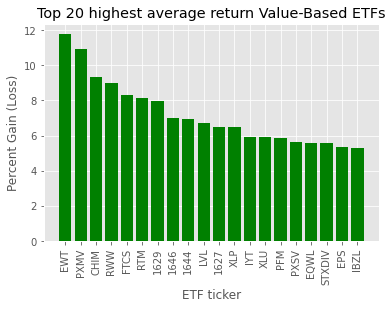

In [113]:
vals = list(top20_growth["avg_return"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(top20_value["fund_symbol"], top20_value["avg_return"], color = colors)
plt.title("Top 20 highest average return Value-Based ETFs")
plt.xlabel("ETF ticker")
plt.ylabel("Percent Gain (Loss)")
plt.xticks(rotation = 90)
plt.show()

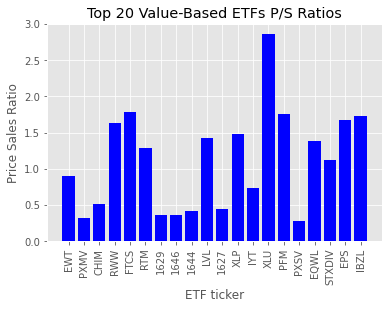

In [213]:
plt.bar(top20_value["fund_symbol"], top20_value["price_sales_ratio"], color = "b")
#plt.plot(top20_value["fund_symbol"], top20_value["avg_return"], marker = "*")
plt.title("Top 20 Value-Based ETFs P/S Ratios")
plt.xlabel("ETF ticker")
plt.ylabel("Price Sales Ratio")
plt.xticks(rotation = 90)
plt.show()

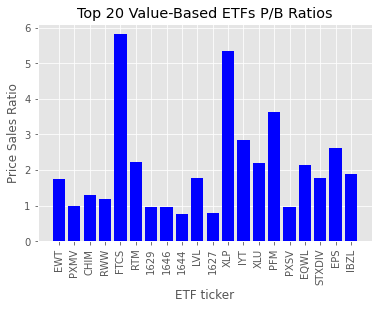

In [214]:
plt.bar(top20_value["fund_symbol"], top20_value["price_book_ratio"], color = "b")
#plt.plot(top20_value["fund_symbol"], top20_value["avg_return"], marker = "*")
plt.title("Top 20 Value-Based ETFs P/B Ratios")
plt.xlabel("ETF ticker")
plt.ylabel("Price Sales Ratio")
plt.xticks(rotation = 90)
plt.show()

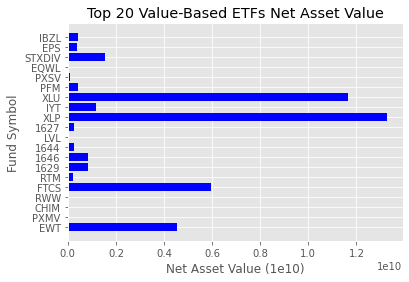

In [215]:
plt.barh(top20_value["fund_symbol"], top20_value["net_asset_value"], color = "b")
plt.title("Top 20 Value-Based ETFs Net Asset Value")
plt.xlabel("Net Asset Value (1e10)")
plt.ylabel("Fund Symbol")
plt.show()

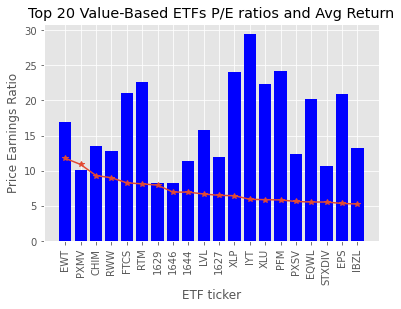

In [117]:
plt.bar(top20_value["fund_symbol"], top20_value["price_earnings_ratio"], color = "b")
plt.plot(top20_value["fund_symbol"], top20_value["avg_return"], marker = "*")
plt.title("Top 20 Value-Based ETFs P/E ratios and Avg Return")
plt.xlabel("ETF ticker")
plt.ylabel("Price Earnings Ratio")
plt.xticks(rotation = 90)
plt.show()

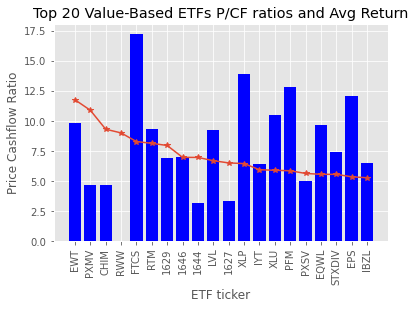

In [118]:
plt.bar(top20_value["fund_symbol"], top20_value["price_cashflow_ratio"], color = "b")
plt.plot(top20_value["fund_symbol"], top20_value["avg_return"], marker = "*")
plt.title("Top 20 Value-Based ETFs P/CF ratios and Avg Return")
plt.xlabel("ETF ticker")
plt.ylabel("Price Cashflow Ratio")
plt.xticks(rotation = 90)
plt.show()

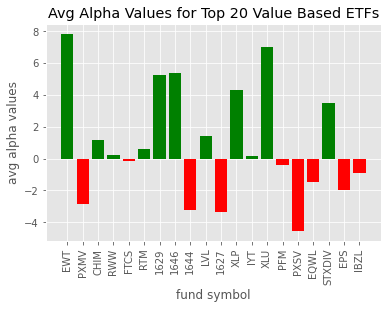

In [209]:
vals = list(value_alpha_top20["avg_alpha"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(value_alpha_top20["fund_symbol"], value_alpha_top20["avg_alpha"], color = colors)
plt.title("Avg Alpha Values for Top 20 Value Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('avg alpha values')
plt.xticks(rotation=90)
plt.show()

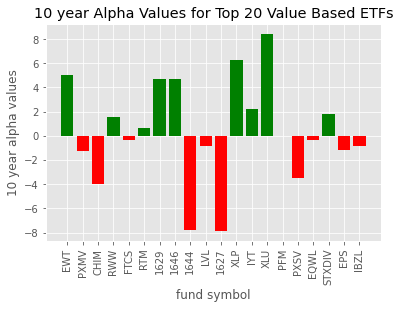

In [210]:
vals = list(value_alpha_top20["fund_alpha_10years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(value_alpha_top20["fund_symbol"], value_alpha_top20["fund_alpha_10years"], color = colors)
plt.title("10 year Alpha Values for Top 20 Value Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('10 year alpha values')
plt.xticks(rotation=90)
plt.show()

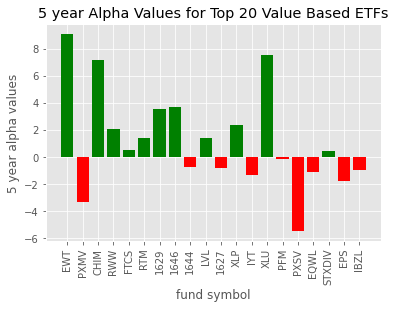

In [211]:
vals = list(value_alpha_top20["fund_alpha_5years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(value_alpha_top20["fund_symbol"], value_alpha_top20["fund_alpha_5years"], color = colors)
plt.title("5 year Alpha Values for Top 20 Value Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('5 year alpha values')
plt.xticks(rotation=90)
plt.show()

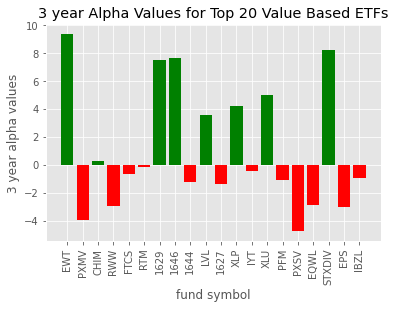

In [212]:
vals = list(value_alpha_top20["fund_alpha_3years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(value_alpha_top20["fund_symbol"], value_alpha_top20["fund_alpha_3years"], color = colors)
plt.title("3 year Alpha Values for Top 20 Value Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('3 year alpha values')
plt.xticks(rotation=90)
plt.show()

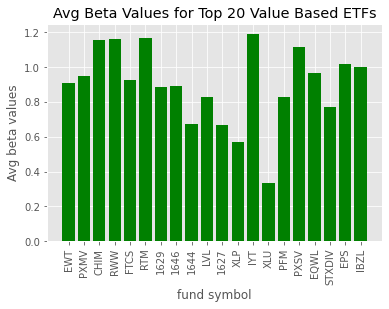

In [219]:
vals = list(value_beta_top20["avg_beta"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(value_beta_top20["fund_symbol"], value_beta_top20["avg_beta"], color = colors)
plt.title("Avg Beta Values for Top 20 Value Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('Avg beta values')
plt.xticks(rotation=90)
plt.show()

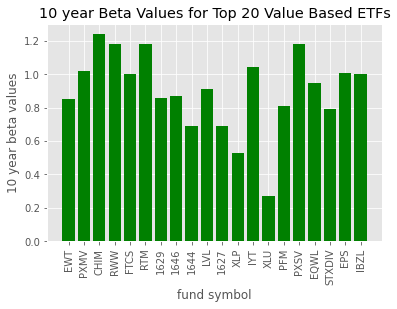

In [220]:
vals = list(value_beta_top20["fund_beta_10years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(value_beta_top20["fund_symbol"], value_beta_top20["fund_beta_10years"], color = colors)
plt.title("10 year Beta Values for Top 20 Value Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('10 year beta values')
plt.xticks(rotation=90)
plt.show()

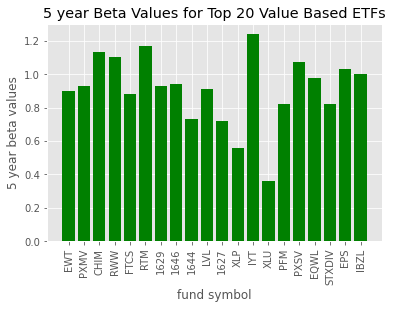

In [221]:
vals = list(value_beta_top20["fund_beta_5years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(value_beta_top20["fund_symbol"], value_beta_top20["fund_beta_5years"], color = colors)
plt.title("5 year Beta Values for Top 20 Value Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('5 year beta values')
plt.xticks(rotation=90)
plt.show()

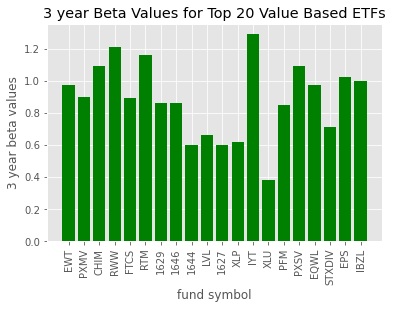

In [222]:
vals = list(value_beta_top20["fund_beta_3years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(value_beta_top20["fund_symbol"], value_beta_top20["fund_beta_3years"], color = colors)
plt.title("3 year Beta Values for Top 20 Value Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('3 year beta values')
plt.xticks(rotation=90)
plt.show()

# Blend Based ETFs

## Top 20 Avg Return ETFs

In [119]:
top20_blend = blend_investment.nlargest(20, "avg_return")
top20_blend_groupby = top20_blend.groupby(by = ['category', 'fund_symbol'])['avg_return'].mean()
top20_blend_groupby

category                   fund_symbol
Consumer Cyclical          ITB            15.250
                           IYC            11.944
                           XHB            12.466
Consumer Defensive         IYK            11.020
Health                     IHF            10.920
                           RYH            10.784
                           VHT            11.084
Large Blend                DSI            10.626
                           IWL            11.492
                           MGC            11.110
                           OEF            11.432
                           SUSA           12.628
                           XLG            13.534
Mid-Cap Blend              NFO            12.410
Miscellaneous Sector       FAN            19.112
                           GRID           15.338
Pacific/Asia ex-Japan Stk  AIA            12.884
Technology                 RYT            14.272
                           SMH            26.830
                           SOX

In [120]:
def Blend_Consumer_cyclical_loop():
    list1 = ["Consumer Cyclical"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(blend_investment[(blend_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(blend_investment[(blend_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_blend[top20_blend["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_blend[top20_blend["category"] == i][j]:
                if k > (blend_investment[(blend_investment['category']== i)][j].mean() + blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (blend_investment[(blend_investment['category']== i)][j].mean() - blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Blend_Consumer_cyclical_loop()

Consumer Cyclical: Average price_earnings_ratio:  22.08
Consumer Cyclical: Standard Deviation price_earnings_ratio:  5.56


Consumer Cyclical's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
ITB                         16.43
XHB                         18.79
IYC                         30.09
	
ETF values less than 1 std from mean:  16.43
ETF values within 1 std from mean:  18.79
ETF values Greater than 1 std from mean:  30.09
____________________________________________________
	
Consumer Cyclical: Average price_book_ratio:  3.46
Consumer Cyclical: Standard Deviation price_book_ratio:  1.7


Consumer Cyclical's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
ITB                      2.41
XHB                      2.84
IYC                      4.76
	
ETF values within 1 std from mean:  2.41
ETF values within 1 std from mean:  2.84
ETF values within 1 std from mean:  4.76
___________________________________

In [121]:
def Blend_Consumer_defensive_loop():
    list1 = ["Consumer Defensive"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(blend_investment[(blend_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(blend_investment[(blend_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_blend[top20_blend["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_blend[top20_blend["category"] == i][j]:
                if k > (blend_investment[(blend_investment['category']== i)][j].mean() + blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (blend_investment[(blend_investment['category']== i)][j].mean() - blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Blend_Consumer_defensive_loop()

Consumer Defensive: Average price_earnings_ratio:  24.09
Consumer Defensive: Standard Deviation price_earnings_ratio:  4.54


Consumer Defensive's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
IYK                         27.45
	
ETF values within 1 std from mean:  27.45
____________________________________________________
	
Consumer Defensive: Average price_book_ratio:  3.42
Consumer Defensive: Standard Deviation price_book_ratio:  1.82


Consumer Defensive's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
IYK                       4.9
	
ETF values within 1 std from mean:  4.9
____________________________________________________
	
Consumer Defensive: Average price_sales_ratio:  1.09
Consumer Defensive: Standard Deviation price_sales_ratio:  0.57


Consumer Defensive's individual ETFs ratio: 
              price_sales_ratio
fund_symbol                   
IYK                        1.9
	
ETF values Greate

In [122]:
def Blend_Health_loop():
    list1 = ["Health"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(blend_investment[(blend_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(blend_investment[(blend_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_blend[top20_blend["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_blend[top20_blend["category"] == i][j]:
                if k > (blend_investment[(blend_investment['category']== i)][j].mean() + blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (blend_investment[(blend_investment['category']== i)][j].mean() - blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Blend_Health_loop()

Health: Average price_earnings_ratio:  22.97
Health: Standard Deviation price_earnings_ratio:  2.94


Health's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
VHT                         23.92
IHF                         15.09
RYH                         24.09
	
ETF values within 1 std from mean:  23.92
ETF values less than 1 std from mean:  15.09
ETF values within 1 std from mean:  24.09
____________________________________________________
	
Health: Average price_book_ratio:  3.89
Health: Standard Deviation price_book_ratio:  0.81


Health's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
VHT                      4.36
IHF                      2.49
RYH                      3.63
	
ETF values within 1 std from mean:  4.36
ETF values less than 1 std from mean:  2.49
ETF values within 1 std from mean:  3.63
____________________________________________________
	
Health: Average price_sales_ratio:  1.88
Health:

In [123]:
def Blend_LargeBlend_loop():
    list1 = ["Large Blend"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(blend_investment[(blend_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(blend_investment[(blend_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_blend[top20_blend["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_blend[top20_blend["category"] == i][j]:
                if k > (blend_investment[(blend_investment['category']== i)][j].mean() + blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (blend_investment[(blend_investment['category']== i)][j].mean() - blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Blend_LargeBlend_loop()

Large Blend: Average price_earnings_ratio:  24.91
Large Blend: Standard Deviation price_earnings_ratio:  2.4


Large Blend's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
XLG                         27.94
SUSA                        26.32
IWL                         26.89
OEF                         26.30
MGC                         26.00
DSI                         26.33
	
ETF values Greater than 1 std from mean:  27.94
ETF values within 1 std from mean:  26.32
ETF values within 1 std from mean:  26.89
ETF values within 1 std from mean:  26.3
ETF values within 1 std from mean:  26.0
ETF values within 1 std from mean:  26.33
____________________________________________________
	
Large Blend: Average price_book_ratio:  3.62
Large Blend: Standard Deviation price_book_ratio:  0.76


Large Blend's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
XLG                      4.76
SUSA                     4.31
IWL

In [124]:
def Blend_MidCapBlend_loop():
    list1 = ["Mid-Cap Blend"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(blend_investment[(blend_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(blend_investment[(blend_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_blend[top20_blend["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_blend[top20_blend["category"] == i][j]:
                if k > (blend_investment[(blend_investment['category']== i)][j].mean() + blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (blend_investment[(blend_investment['category']== i)][j].mean() - blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Blend_MidCapBlend_loop()

Mid-Cap Blend: Average price_earnings_ratio:  20.7
Mid-Cap Blend: Standard Deviation price_earnings_ratio:  3.3


Mid-Cap Blend's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
NFO                         25.89
	
ETF values Greater than 1 std from mean:  25.89
____________________________________________________
	
Mid-Cap Blend: Average price_book_ratio:  2.47
Mid-Cap Blend: Standard Deviation price_book_ratio:  0.73


Mid-Cap Blend's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
NFO                      3.07
	
ETF values within 1 std from mean:  3.07
____________________________________________________
	
Mid-Cap Blend: Average price_sales_ratio:  1.4
Mid-Cap Blend: Standard Deviation price_sales_ratio:  0.42


Mid-Cap Blend's individual ETFs ratio: 
              price_sales_ratio
fund_symbol                   
NFO                       2.29
	
ETF values Greater than 1 std from mean:  2.29
___________

In [125]:
def Blend_MiscSect_loop():
    list1 = ["Miscellaneous Sector"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(blend_investment[(blend_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(blend_investment[(blend_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_blend[top20_blend["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_blend[top20_blend["category"] == i][j]:
                if k > (blend_investment[(blend_investment['category']== i)][j].mean() + blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (blend_investment[(blend_investment['category']== i)][j].mean() - blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Blend_MiscSect_loop()

Miscellaneous Sector: Average price_earnings_ratio:  24.81
Miscellaneous Sector: Standard Deviation price_earnings_ratio:  1.92


Miscellaneous Sector's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
FAN                         22.62
GRID                        24.04
	
ETF values less than 1 std from mean:  22.62
ETF values within 1 std from mean:  24.04
____________________________________________________
	
Miscellaneous Sector: Average price_book_ratio:  2.54
Miscellaneous Sector: Standard Deviation price_book_ratio:  0.79


Miscellaneous Sector's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
FAN                      2.12
GRID                     2.73
	
ETF values within 1 std from mean:  2.12
ETF values within 1 std from mean:  2.73
____________________________________________________
	
Miscellaneous Sector: Average price_sales_ratio:  1.47
Miscellaneous Sector: Standard Deviation price_sales_ratio:

In [126]:
def Blend_PacificAsia_stk_loop():
    list1 = ["Pacific/Asia ex-Japan Stk"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(blend_investment[(blend_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(blend_investment[(blend_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_blend[top20_blend["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_blend[top20_blend["category"] == i][j]:
                if k > (blend_investment[(blend_investment['category']== i)][j].mean() + blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (blend_investment[(blend_investment['category']== i)][j].mean() - blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Blend_PacificAsia_stk_loop()

Pacific/Asia ex-Japan Stk: Average price_earnings_ratio:  17.02
Pacific/Asia ex-Japan Stk: Standard Deviation price_earnings_ratio:  0.69


Pacific/Asia ex-Japan Stk's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
AIA                         16.73
	
ETF values within 1 std from mean:  16.73
____________________________________________________
	
Pacific/Asia ex-Japan Stk: Average price_book_ratio:  1.68
Pacific/Asia ex-Japan Stk: Standard Deviation price_book_ratio:  0.16


Pacific/Asia ex-Japan Stk's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
AIA                      1.61
	
ETF values within 1 std from mean:  1.61
____________________________________________________
	
Pacific/Asia ex-Japan Stk: Average price_sales_ratio:  1.49
Pacific/Asia ex-Japan Stk: Standard Deviation price_sales_ratio:  0.53


Pacific/Asia ex-Japan Stk's individual ETFs ratio: 
              price_sales_ratio
fund_symbol      

In [127]:
def Blend_tech_loop():
    list1 = ["Technology"]
    ratios = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio","asset_stocks","asset_bonds"]
    for i in list1:
        for j in ratios:
            print(i + ": Average " + j + ": ", round(blend_investment[(blend_investment['category']
            == i)][j].mean(), 2))
            print(i + ": Standard Deviation " + j + ": ", round(blend_investment[(blend_investment['category'] == i)][j].std(),2))
            print("\n")
            
            print(i + "'s individual ETFs " + "ratio: \n", top20_blend[top20_blend["category"] == i]
                  [['fund_symbol',j]].set_index("fund_symbol"))
            print("\t")
            for k in top20_blend[top20_blend["category"] == i][j]:
                if k > (blend_investment[(blend_investment['category']== i)][j].mean() + blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values Greater than 1 std from mean: ", k)
                elif k < (blend_investment[(blend_investment['category']== i)][j].mean() - blend_investment[(blend_investment["category"] == i)][j].std()):
                    print("ETF values less than 1 std from mean: ", k)
                else:
                    print("ETF values within 1 std from mean: ", k)
            print("____________________________________________________")
            print("\t")
Blend_tech_loop()

Technology: Average price_earnings_ratio:  24.7
Technology: Standard Deviation price_earnings_ratio:  3.51


Technology's individual ETFs ratio: 
              price_earnings_ratio
fund_symbol                      
SMH                         27.82
SOXX                        27.98
RYT                         27.73
	
ETF values within 1 std from mean:  27.82
ETF values within 1 std from mean:  27.98
ETF values within 1 std from mean:  27.73
____________________________________________________
	
Technology: Average price_book_ratio:  3.28
Technology: Standard Deviation price_book_ratio:  1.4


Technology's individual ETFs ratio: 
              price_book_ratio
fund_symbol                  
SMH                      5.65
SOXX                     5.54
RYT                      4.38
	
ETF values Greater than 1 std from mean:  5.65
ETF values Greater than 1 std from mean:  5.54
ETF values within 1 std from mean:  4.38
____________________________________________________
	
Technology: Average 

In [223]:
blend_beta_top20 = top20_blend[["fund_symbol","fund_beta_3years","fund_beta_5years","fund_beta_10years"]]
blend_alpha_top20 = top20_blend[["fund_symbol","fund_alpha_3years","fund_alpha_5years","fund_alpha_10years"]]

blend_alpha_top20["avg_alpha"] = (top20_blend["fund_alpha_3years"] + top20_blend["fund_alpha_5years"] +
                   top20_blend["fund_alpha_10years"]) / 3

blend_beta_top20["avg_beta"] = (top20_blend["fund_beta_3years"] + top20_blend["fund_beta_5years"] +
                   top20_blend["fund_beta_10years"]) / 3

<ipython-input-223-0b93f06c7e79>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blend_alpha_top20["avg_alpha"] = (top20_blend["fund_alpha_3years"] + top20_blend["fund_alpha_5years"] +
<ipython-input-223-0b93f06c7e79>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blend_beta_top20["avg_beta"] = (top20_blend["fund_beta_3years"] + top20_blend["fund_beta_5years"] +


In [224]:
blend_alpha_top20

,fund_symbol,fund_alpha_3years,fund_alpha_5years,fund_alpha_10years,avg_alpha
1393,SMH,14.86,16.94,0.00,10.600000
1402,SOXX,15.42,17.67,11.63,14.906667
509,FAN,8.00,5.54,0.22,4.586667
685,GRID,3.79,5.76,0.20,3.250000
901,ITB,5.38,4.21,7.45,5.680000
1330,RYT,8.32,8.99,7.29,8.200000
1637,XLG,2.64,1.93,0.95,1.840000
134,AIA,7.42,8.10,4.63,6.716667
1453,SUSA,1.57,1.11,-0.43,0.750000
1628,XHB,3.61,-1.32,4.36,2.216667


In [225]:
blend_alpha_top20.describe()

,fund_alpha_3years,fund_alpha_5years,fund_alpha_10years,avg_alpha
count,20.00000,20.000000,20.000000,20.000000
mean,5.42050,4.284500,3.645500,4.450167
std,4.20877,5.216224,4.123945,3.883236
min,0.75000,-1.320000,-2.300000,-0.043333
25%,2.08750,0.950000,0.215000,0.949167
50%,4.42500,2.520000,2.655000,3.918333
75%,7.70750,5.595000,7.360000,6.254167
max,15.42000,17.670000,11.630000,14.906667


In [226]:
blend_beta_top20

,fund_symbol,fund_beta_3years,fund_beta_5years,fund_beta_10years,avg_beta
1393,SMH,1.21,1.22,0.00,0.810000
1402,SOXX,1.23,1.25,1.16,1.213333
509,FAN,0.94,0.96,1.11,1.003333
685,GRID,1.23,1.22,1.14,1.196667
901,ITB,1.64,1.61,1.40,1.550000
1330,RYT,1.13,1.13,1.10,1.120000
1637,XLG,1.00,0.98,0.98,0.986667
134,AIA,0.98,1.01,0.97,0.986667
1453,SUSA,0.99,1.00,1.00,0.996667
1628,XHB,1.58,1.55,1.36,1.496667


In [227]:
blend_beta_top20.describe()

,fund_beta_3years,fund_beta_5years,fund_beta_10years,avg_beta
count,20.000000,20.000000,20.000000,20.000000
mean,1.069500,1.066500,0.969000,1.035000
std,0.222485,0.213622,0.284862,0.201502
min,0.810000,0.820000,0.000000,0.796667
25%,0.940000,0.950000,0.922500,0.935833
50%,0.990000,0.995000,0.985000,0.990000
75%,1.165000,1.152500,1.112500,1.077500
max,1.640000,1.610000,1.400000,1.550000


<AxesSubplot:>

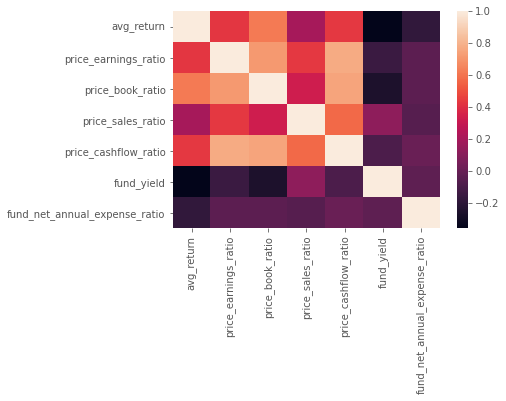

In [128]:
sns.heatmap(blend_investment[["avg_return","price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio"]].corr())

<AxesSubplot:>

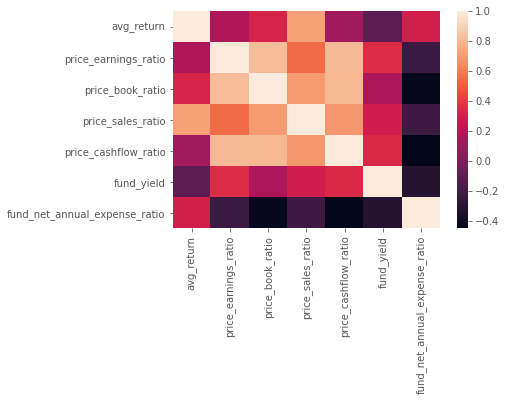

In [129]:
sns.heatmap(top20_blend[["avg_return","price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio", "fund_yield",
             "fund_net_annual_expense_ratio"]].corr())

## linear regression for top 20 blend based ETFs

In [130]:
x = top20_blend[["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio"]]
y = top20_blend['avg_return']

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=42)

In [132]:
linear_model = LinearRegression()

In [133]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [134]:
y_pred = linear_model.predict(x_test)

In [135]:
r2 = linear_model.score(x,y)

In [136]:
r2

-2.0443329086831317

## Visuals for top 20 blend based ETFs

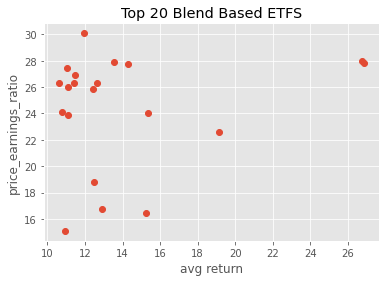

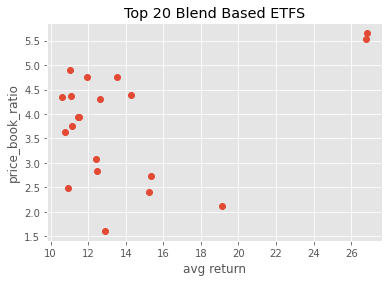

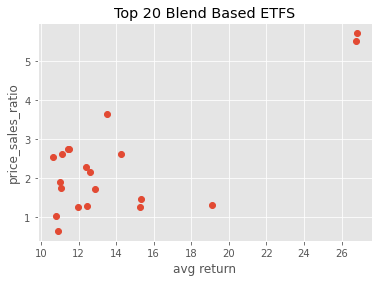

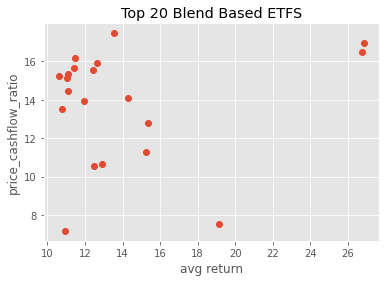

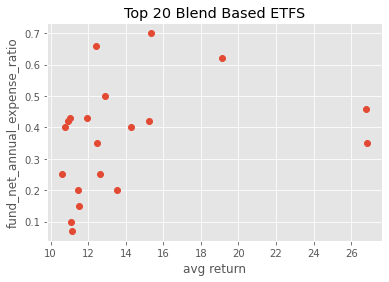

In [139]:
for i in range(5):    
    ratios1 = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio",
             "fund_net_annual_expense_ratio"]
    x = top20_blend["avg_return"]
    y = top20_blend[ratios1[i]]
    plt.plot(x,y,"o")
    plt.xlabel("avg return")
    plt.title("Top 20 Blend Based ETFS")
    plt.ylabel(ratios1[i])
    plt.show()

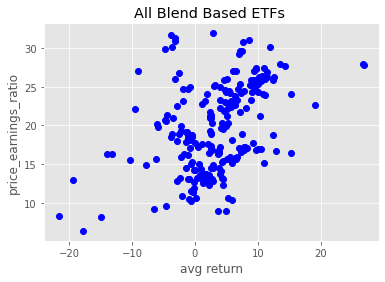

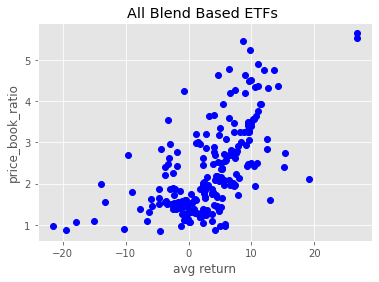

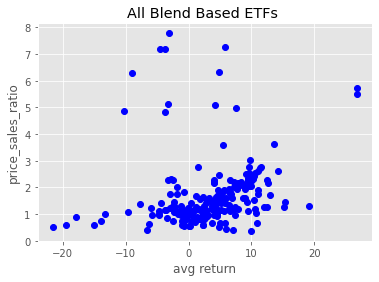

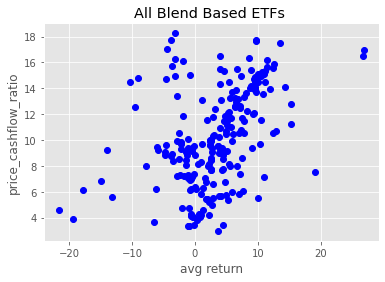

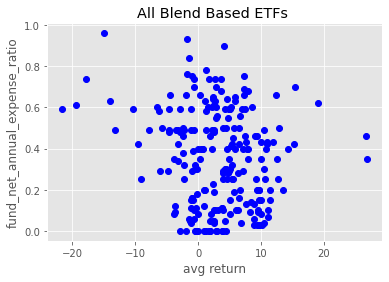

In [141]:
for i in range(5):    
    ratios1 = ["price_earnings_ratio", "price_book_ratio", "price_sales_ratio", "price_cashflow_ratio",
             "fund_net_annual_expense_ratio"]
    x = blend_investment["avg_return"]
    y = blend_investment[ratios1[i]]
    plt.plot(x,y,"o", color='b')
    plt.xlabel("avg return")
    plt.title("All Blend Based ETFs ")
    plt.ylabel(ratios1[i])
    plt.show()

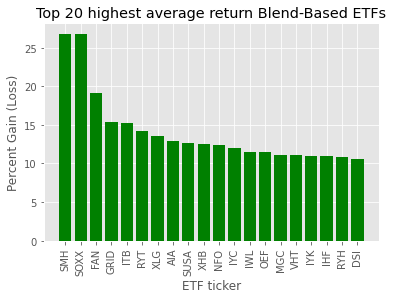

In [142]:
vals = list(top20_growth["avg_return"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(top20_blend["fund_symbol"], top20_blend["avg_return"], color = colors)
plt.title("Top 20 highest average return Blend-Based ETFs")
plt.xlabel("ETF ticker")
plt.ylabel("Percent Gain (Loss)")
plt.xticks(rotation = 90)
plt.show()

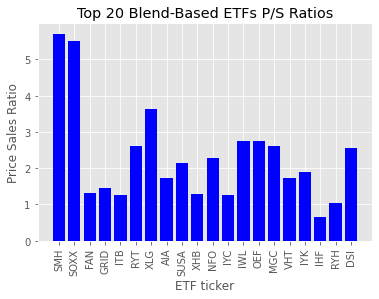

In [228]:
plt.bar(top20_blend["fund_symbol"], top20_blend["price_sales_ratio"], color = "b")
#plt.plot(top20_value["fund_symbol"], top20_value["avg_return"], marker = "*")
plt.title("Top 20 Blend-Based ETFs P/S Ratios")
plt.xlabel("ETF ticker")
plt.ylabel("Price Sales Ratio")
plt.xticks(rotation = 90)
plt.show()

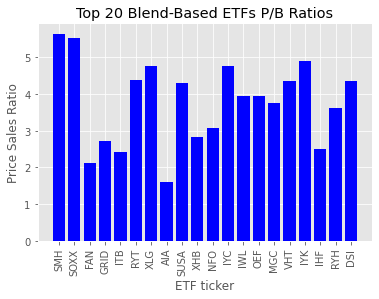

In [229]:
plt.bar(top20_blend["fund_symbol"], top20_blend["price_book_ratio"], color = "b")
#plt.plot(top20_blend["fund_symbol"], top20_blend["avg_return"], marker = "*")
plt.title("Top 20 Blend-Based ETFs P/B Ratios")
plt.xlabel("ETF ticker")
plt.ylabel("Price Sales Ratio")
plt.xticks(rotation = 90)
plt.show()

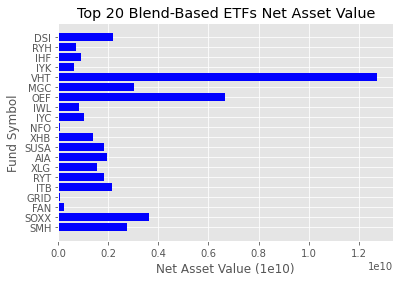

In [230]:
plt.barh(top20_blend["fund_symbol"], top20_blend["net_asset_value"], color = "b")
plt.title("Top 20 Blend-Based ETFs Net Asset Value")
plt.xlabel("Net Asset Value (1e10)")
plt.ylabel("Fund Symbol")
plt.show()

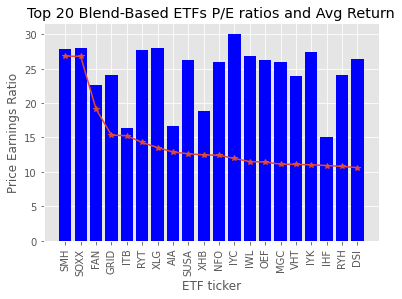

In [146]:
plt.bar(top20_blend["fund_symbol"], top20_blend["price_earnings_ratio"], color = "b")
plt.plot(top20_blend["fund_symbol"], top20_blend["avg_return"], marker = "*")
plt.title("Top 20 Blend-Based ETFs P/E ratios and Avg Return")
plt.xlabel("ETF ticker")
plt.ylabel("Price Earnings Ratio")
plt.xticks(rotation = 90)
plt.show()

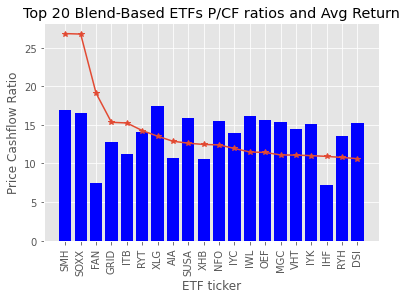

In [147]:
plt.bar(top20_blend["fund_symbol"], top20_blend["price_cashflow_ratio"], color = "b")
plt.plot(top20_blend["fund_symbol"], top20_blend["avg_return"], marker = "*")
plt.title("Top 20 Blend-Based ETFs P/CF ratios and Avg Return")
plt.xlabel("ETF ticker")
plt.ylabel("Price Cashflow Ratio")
plt.xticks(rotation = 90)
plt.show()

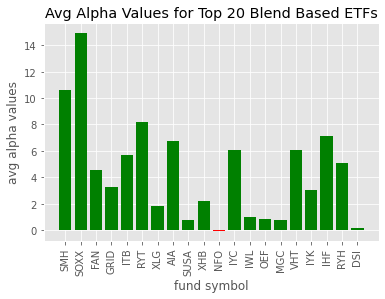

In [231]:
vals = list(blend_alpha_top20["avg_alpha"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(blend_alpha_top20["fund_symbol"], blend_alpha_top20["avg_alpha"], color = colors)
plt.title("Avg Alpha Values for Top 20 Blend Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('avg alpha values')
plt.xticks(rotation=90)
plt.show()

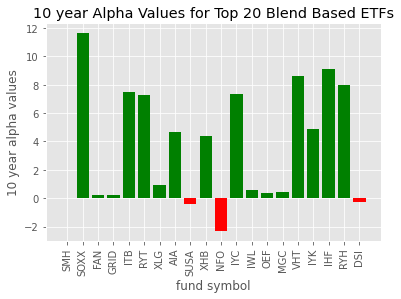

In [232]:
vals = list(blend_alpha_top20["fund_alpha_10years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(blend_alpha_top20["fund_symbol"], blend_alpha_top20["fund_alpha_10years"], color = colors)
plt.title("10 year Alpha Values for Top 20 Blend Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('10 year alpha values')
plt.xticks(rotation=90)
plt.show()

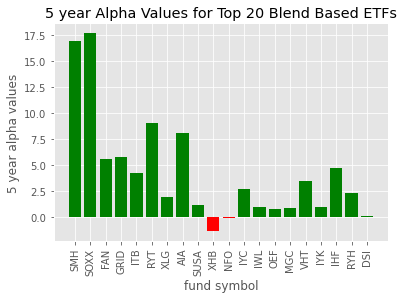

In [233]:
vals = list(blend_alpha_top20["fund_alpha_5years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(blend_alpha_top20["fund_symbol"], blend_alpha_top20["fund_alpha_5years"], color = colors)
plt.title("5 year Alpha Values for Top 20 Blend Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('5 year alpha values')
plt.xticks(rotation=90)
plt.show()

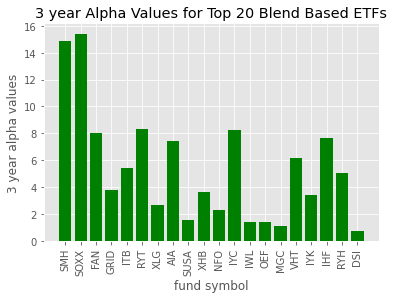

In [234]:
vals = list(blend_alpha_top20["fund_alpha_3years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(blend_alpha_top20["fund_symbol"], blend_alpha_top20["fund_alpha_3years"], color = colors)
plt.title("3 year Alpha Values for Top 20 Blend Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('3 year alpha values')
plt.xticks(rotation=90)
plt.show()

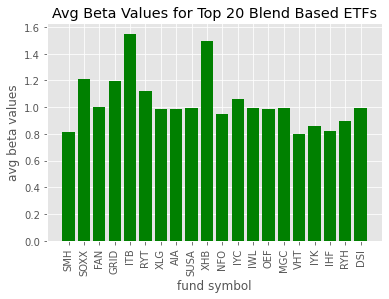

In [235]:
vals = list(blend_beta_top20["avg_beta"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(blend_beta_top20["fund_symbol"], blend_beta_top20["avg_beta"], color = colors)
plt.title("Avg Beta Values for Top 20 Blend Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('avg beta values')
plt.xticks(rotation=90)
plt.show()

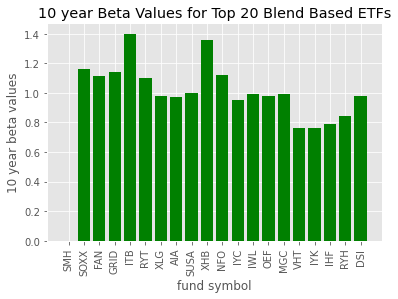

In [236]:
vals = list(blend_beta_top20["fund_beta_10years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(blend_beta_top20["fund_symbol"], blend_beta_top20["fund_beta_10years"], color = colors)
plt.title("10 year Beta Values for Top 20 Blend Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('10 year beta values')
plt.xticks(rotation=90)
plt.show()

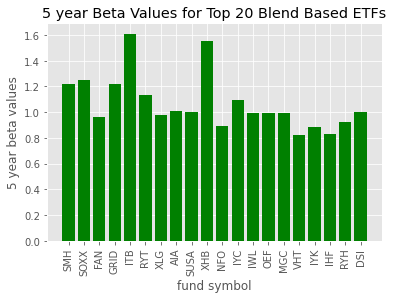

In [237]:
vals = list(blend_beta_top20["fund_beta_5years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(blend_beta_top20["fund_symbol"], blend_beta_top20["fund_beta_5years"], color = colors)
plt.title("5 year Beta Values for Top 20 Blend Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('5 year beta values')
plt.xticks(rotation=90)
plt.show()

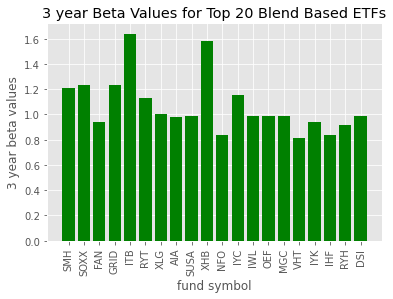

In [238]:
vals = list(blend_beta_top20["fund_beta_3years"])
colors = ["red" if i < 0 else "green" for i in vals]

plt.bar(blend_beta_top20["fund_symbol"], blend_beta_top20["fund_beta_3years"], color = colors)
plt.title("3 year Beta Values for Top 20 Blend Based ETFs")
plt.xlabel('fund symbol')
plt.ylabel('3 year beta values')
plt.xticks(rotation=90)
plt.show()